### GBM

In [3]:
import os
os.environ['JAVA_HOME'] = '/opt/homebrew/opt/openjdk@11'
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.model_selection import train_test_split

# Initialize the H2O server
h2o.init()

# Load your dataset
data = pd.read_csv('../2 - Data/develop.csv')  # Path to your data
target = 'Ins'  # Define your target variable

# Split the dataset into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data[target])

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

# Set the target and predictor variables
x = train_h2o.columns
y = target
x.remove(y)  # Remove the target from predictors

# Convert the target column to a factor for classification
train_h2o[y] = train_h2o[y].asfactor()
test_h2o[y] = test_h2o[y].asfactor()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,18 hours 35 mins
H2O_cluster_timezone:,Europe/Vilnius
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_zydrunasbautronis_zdukc4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.328 Gb
H2O_cluster_total_cores:,11
H2O_cluster_allowed_cores:,11
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
print("Is H2O XGBoost available?", h2o.H2OXGBoostEstimator.available())

AttributeError: module 'h2o' has no attribute 'H2OXGBoostEstimator'

In [10]:
# Initialize and run H2O AutoML
aml = H2OAutoML(max_models=20, seed=42, balance_classes=True, max_runtime_secs=600)
aml.train(x=x, y=y, training_frame=train_h2o)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Display all models ranked by performance

# Get the best model
best_model = aml.leader

# Make predictions on the test set
preds = best_model.predict(test_h2o)

# Evaluate model performance
performance = best_model.model_performance(test_h2o)
print(performance)

AutoML progress: |
19:59:16.771: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_5_AutoML_1_20241013_195916                        0.803896   0.507059  0.671778                0.264639  0.409847  0.167974
GBM_2_AutoML_1_20241013_195916                        0.802247   0.508616  0.668689                0.266566  0.411001  0.168922
GBM_grid_1_AutoML_1_20241013_195916_model_1           0.801892   0.509259  0.664671                0.266063  0.411054  0.168965
GBM_1_AutoML_1_20241013_195916                        0.801451   0.509409  0.664851                0.267052  0.411305  0.169172
GBM_3_AutoML_1_20241013_195916                        0.800572   0.510926  0.663412                0.267764  0.41191   0.16967
GBM_grid_1_AutoML_1_20241013_195916_model_5           0.797223   0.51456   

In [11]:
from h2o.estimators import H2OGradientBoostingEstimator
# Train a separate H2O GBM model
gbm_model = H2OGradientBoostingEstimator(ntrees=50, max_depth=6, seed=42)
gbm_model.train(x=x, y=y, training_frame=train_h2o)

# Evaluate the GBM model on the test set
performance_gbm = gbm_model.model_performance(test_h2o)
print("GBM Model Performance on Test Data:")
print(performance_gbm)

# Get predictions from the GBM model
gbm_preds = gbm_model.predict(test_h2o)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
GBM Model Performance on Test Data:
ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.16452545826688678
RMSE: 0.40561737914799306
LogLoss: 0.4991488595607459
Mean Per-Class Error: 0.2555930002768576
AUC: 0.812042561812961
AUCPR: 0.684771558335646
Gini: 0.624085123625922

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34650113400088184
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3130  1088  0.2579   (1088.0/4218.0)
1      566   1669  0.2532   (566.0/2235.0)
Total  3696  2757  0.2563   (1654.0/6453.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.346501     0.66867   232
max f2                       0.178931     0.774164  317
max f0point5                 0.499221     0.6577

In [17]:
from h2o.estimators import H2OGradientBoostingEstimator
# Train a separate H2O GBM model
gbm_model = H2OGradientBoostingEstimator(ntrees=10, max_depth=4, seed=42)
gbm_model.train(x=x, y=y, training_frame=train_h2o)

# Evaluate the GBM model on the test set
performance_gbm = gbm_model.model_performance(test_h2o)
print("GBM Model Performance on Test Data:")
print(performance_gbm)

# Get predictions from the GBM model
gbm_preds = gbm_model.predict(test_h2o)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
GBM Model Performance on Test Data:
ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18153042306954773
RMSE: 0.4260638720538832
LogLoss: 0.5449447989485696
Mean Per-Class Error: 0.2683041041748212
AUC: 0.7955027616807906
AUCPR: 0.6583994918395207
Gini: 0.5910055233615812

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3296838002342273
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2885  1333  0.316    (1333.0/4218.0)
1      493   1742  0.2206   (493.0/2235.0)
Total  3378  3075  0.283    (1826.0/6453.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.329684     0.656121  333
max f2                       0.243784     0.763831  393
max f0point5                 0.42235      0.642

In [20]:
import os

# Save the GBM model as MOJO and download h2o-genmodel.jar to the current working directory
mojo_path = gbm_model.download_mojo(path=os.getcwd(), get_genmodel_jar=True)
print("MOJO path:", mojo_path)

MOJO path: /Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/6 - notebooks/GBM_model_python_1728838744377_1869.zip


In [ ]:
# java -cp h2o-genmodel.jar hex.genmodel.tools.PrintMojo --tree 0 -i GBM_model_python_1728838744377_1869.zip -o model.gv -f 20 -d 3
# dot -Tpng model.gv -o model.png

### DEEP LEARNING


In [21]:
from h2o.estimators import H2ODeepLearningEstimator

# Sukurkite giluminio mokymosi modelį
dl_model = H2ODeepLearningEstimator(
    activation="RectifierWithDropout",  # Naudojame ReLU su dropout'u
    hidden=[128, 128, 64],  # Nustatome paslėptųjų sluoksnių dydį
    epochs=50,  # Kiek epochų
    l1=1e-5,  # L1 reguliavimas
    l2=1e-5,  # L2 reguliavimas
    input_dropout_ratio=0.2,  # Dropout įėjimo sluoksnyje
    train_samples_per_iteration=-1,  # Automatiškai optimizuoja treniravimą
    stopping_metric="AUC",  # Naudojame AUC kaip sustabdymo kriterijų
    stopping_rounds=5,  # Sustabdoma po 5 raundų be patobulinimo
    seed=42
)

# Treniruokite giluminio mokymosi modelį su treniravimo duomenimis
dl_model.train(x=x, y=y, training_frame=train_h2o, validation_frame=test_h2o)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1728838744377_1882


Status of Neuron Layers: predicting Ins, 2-class classification, bernoulli distribution, CrossEntropy loss, 33,858 weights/biases, 412.2 KB, 1,290,550 training samples, mini-batch size 1
    layer    units    type              dropout    l1     l2     mean_rate              rate_rms               momentum    mean_weight           weight_rms           mean_bias             bias_rms
--  -------  -------  ----------------  ---------  -----  -----  ---------------------  ---------------------  ----------  --------------------  -------------------  --------------------  -------------------
    1        69       Input             20.0
    2        128      RectifierDropout  50.0       1e-05  1e-05  0.037320233890980395   0.17077940702438354    0.0         -0.02124999892804437  0.1901262402534485   -0.14078804829281785  0.16242963075637817
    3        128      RectifierDropout  50.0       1e-05  1e-05  0.015203283270913914   0.010227121412754059   0.0         -0.05174511837796891  0.1138710081577301   0.5441992797856354    0.24740982055664062
    4        64       RectifierDropout  50.0       1e-05  1e-05  0.016392139243695425   0.02889145165681839    0.0         -0.04773560547426836  0.14202791452407837  0.6930673086630925    0.29673755168914795
    5        2        Softmax                      1e-05  1e-05  0.0028058146807552475  0.0018656793981790543  0.0         -0.0418093858352222   0.6056675910949707   0.08379283578002426   0.23748379945755005

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.1672044533826499
RMSE: 0.40890641152059465
LogLoss: 0.5073681539230241
Mean Per-Class Error: 0.2605114439731354
AUC: 0.808189709261223
AUCPR: 0.6757774019520933
Gini: 0.616379418522446

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34603389788878375
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      4861  1699  0.259    (1699.0/6560.0)
1      904   2546  0.262    (904.0/3450.0)
Total  5765  4245  0.26     (2603.0/10010.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.346034     0.661728  229
max f2                       0.178643     0.772814  319
max f0point5                 0.483159     0.649615  161
max accuracy                 0.483159     0.755544  161
max precision                0.833826     0.954545  14
max recall                   0.0358763    1         399
max specificity              0.997839     0.999848  0
max absolute_mcc             0.346034     0.460615  229
max min_per_class_accuracy   0.34443      0.738567  230
max mean_per_class_accuracy  0.346034     0.739489  229
max tns                      0.997839     6559      0
max fns                      0.997839     3448      0
max fps                      0.0439488    6560      398
max tps                      0.0358763    3450      399
max tnr                      0.997839     0.999848  0
max fnr                      0.997839     0.99942   0
max fpr                      0.0439488    1         398
max tpr                      0.0358763    1         399

Gains/Lift Table: Avg response rate: 34.47 %, avg score: 34.37 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100899                   0.802789           2.70036   2.70036            0.930693         0.847657  0.9

In [22]:
# Ivertiname modelį naudodami testavimo duomenis
performance = dl_model.model_performance(test_h2o)
print("Modelio tikslumas (Accuracy):", performance.accuracy())
print("AUC reikšmė:", performance.auc())
print("Logaritminio nuostolio reikšmė:", performance.logloss())

Modelio tikslumas (Accuracy): [[0.45676166930558093, 0.7543778087711142]]
AUC reikšmė: 0.8023936511573388
Logaritminio nuostolio reikšmė: 0.5128137192831096


In [23]:
preds = dl_model.predict(test_h2o)
print(preds.head())

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
  predict        p0        p1
        0  0.814183  0.185817
        1  0.387012  0.612988
        0  0.852205  0.147795
        0  0.705061  0.294939
        1  0.243175  0.756825
        0  0.815058  0.184942
        1  0.360677  0.639323
        0  0.838507  0.161493
        1  0.380079  0.619921
        0  0.844521  0.155479
[10 rows x 3 columns]



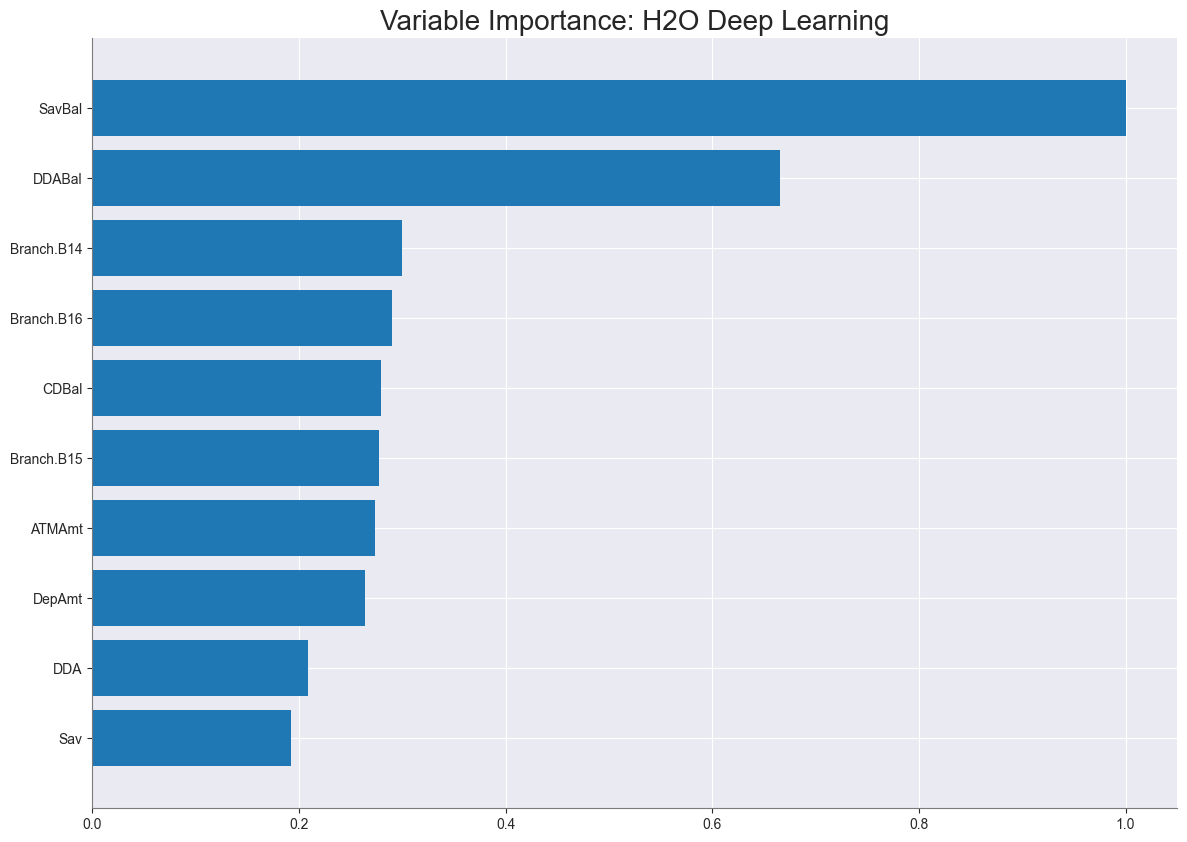

<Figure size 640x480 with 0 Axes>

In [24]:
# Patikrinkite kintamųjų svarbą giluminio mokymosi modelyje
if dl_model.varimp():
    dl_model.varimp_plot()
else:
    print("Šiame giluminio mokymosi modelyje kintamųjų svarba nėra prieinama.")

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_model_python_1728838744377_1882

,0,1,Error,Rate
0,3058.0,1160.0,0.275,(1160.0/4218.0)
1,563.0,1672.0,0.2519,(563.0/2235.0)
Total,3621.0,2832.0,0.267,(1723.0/6453.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

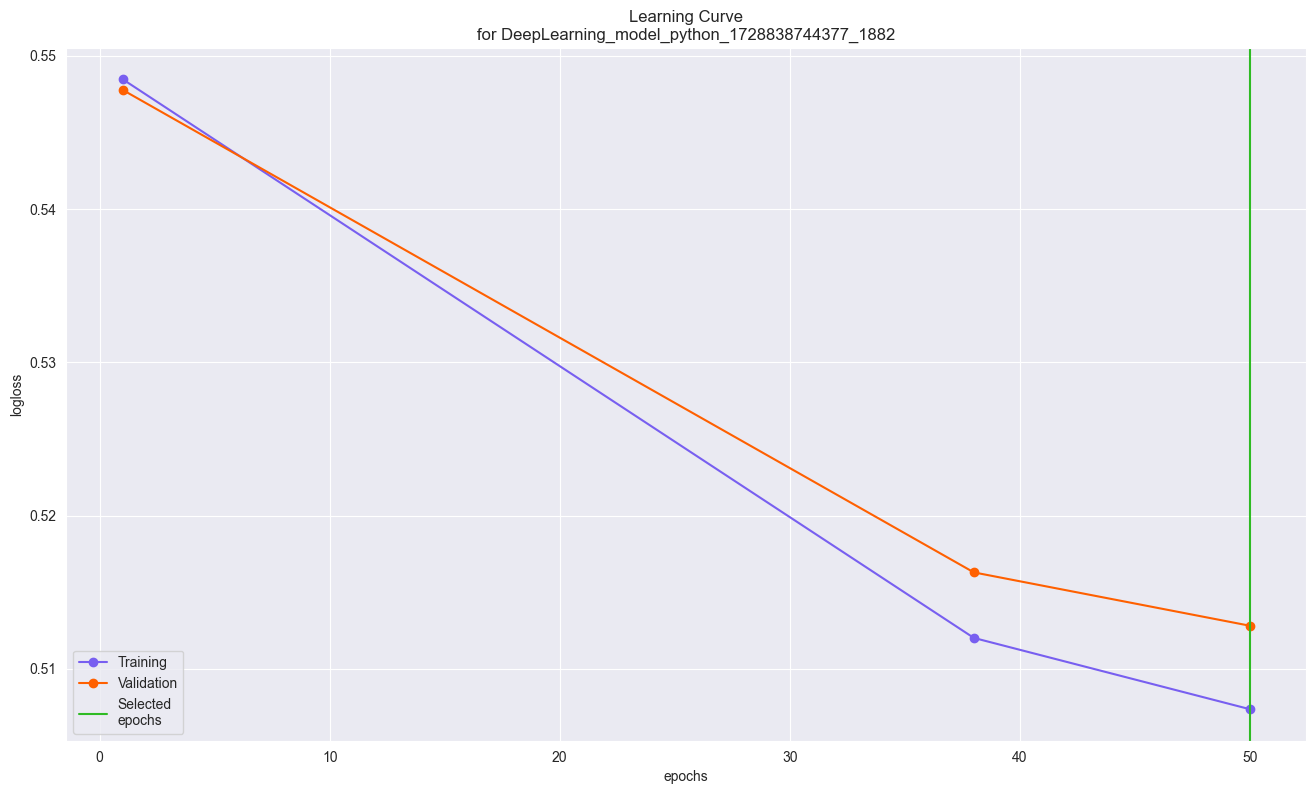

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

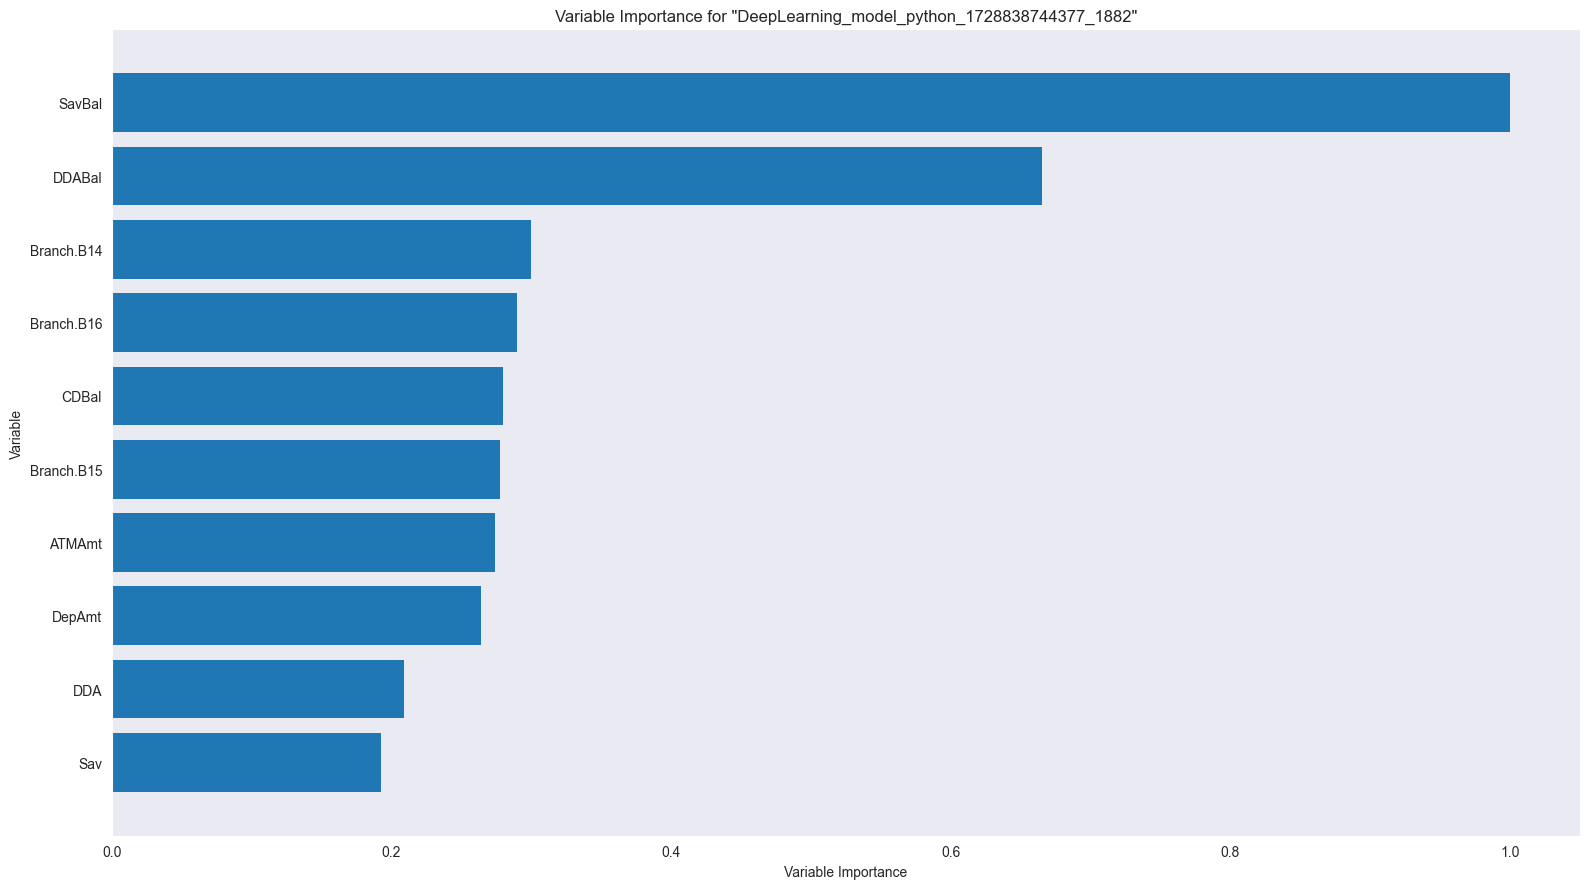

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

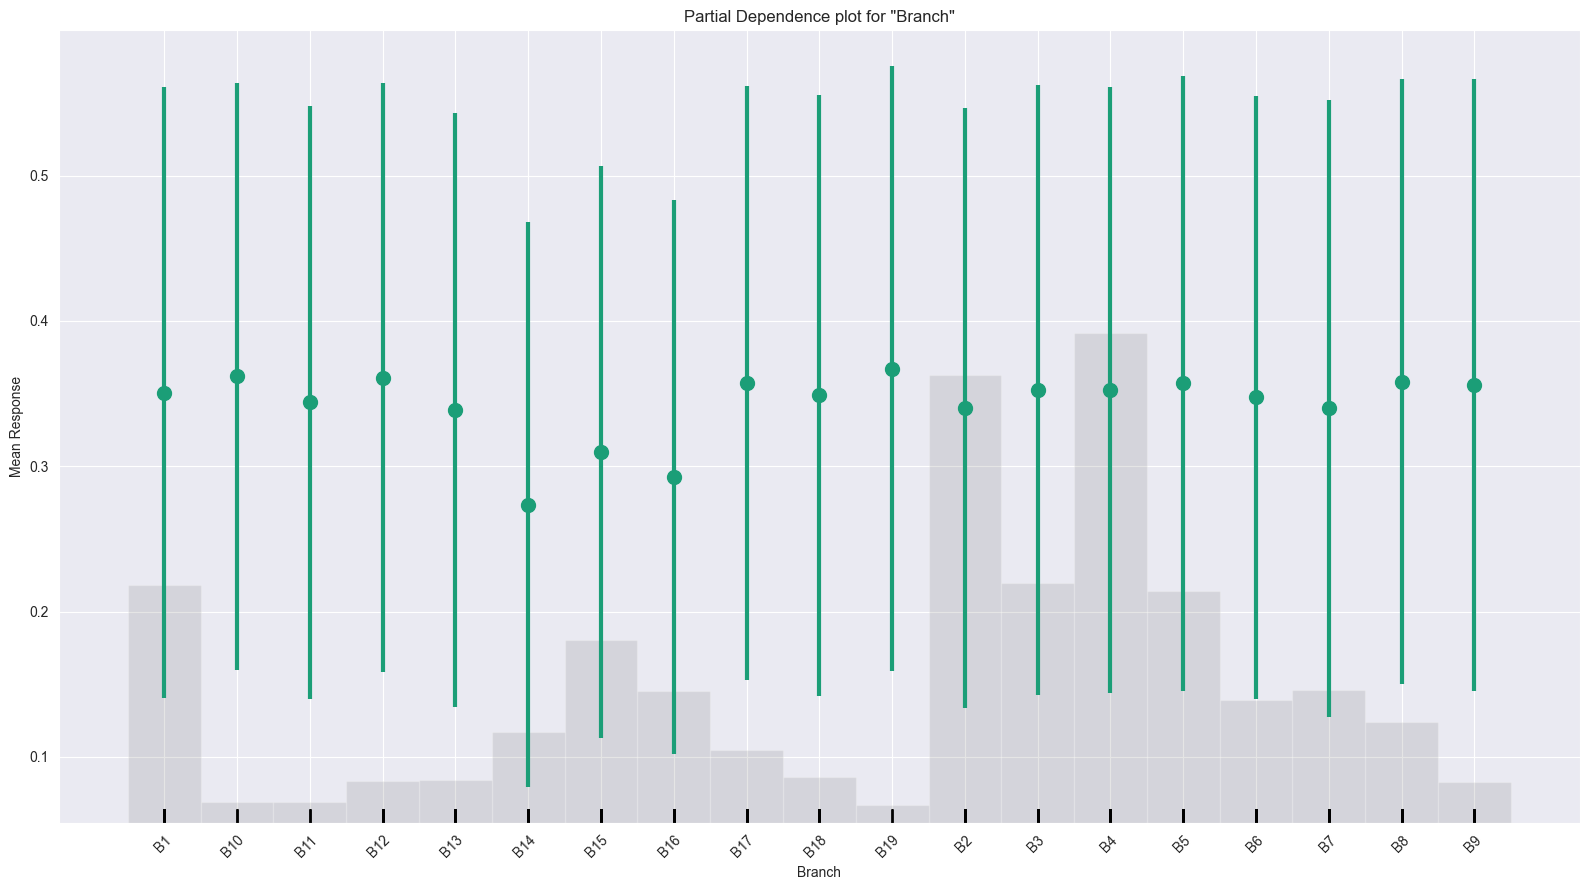

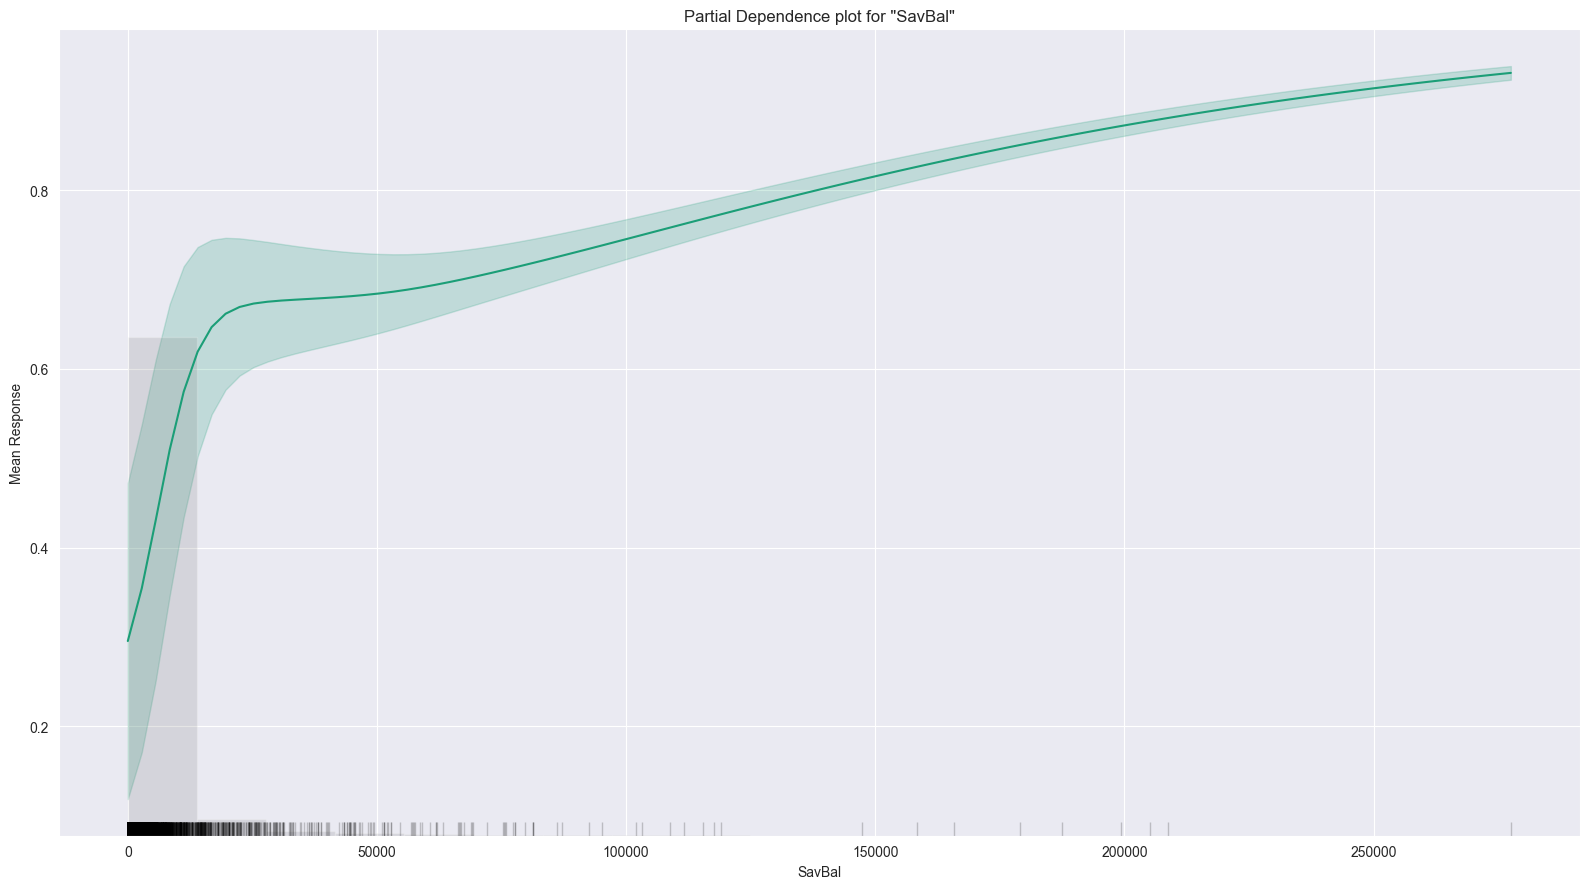

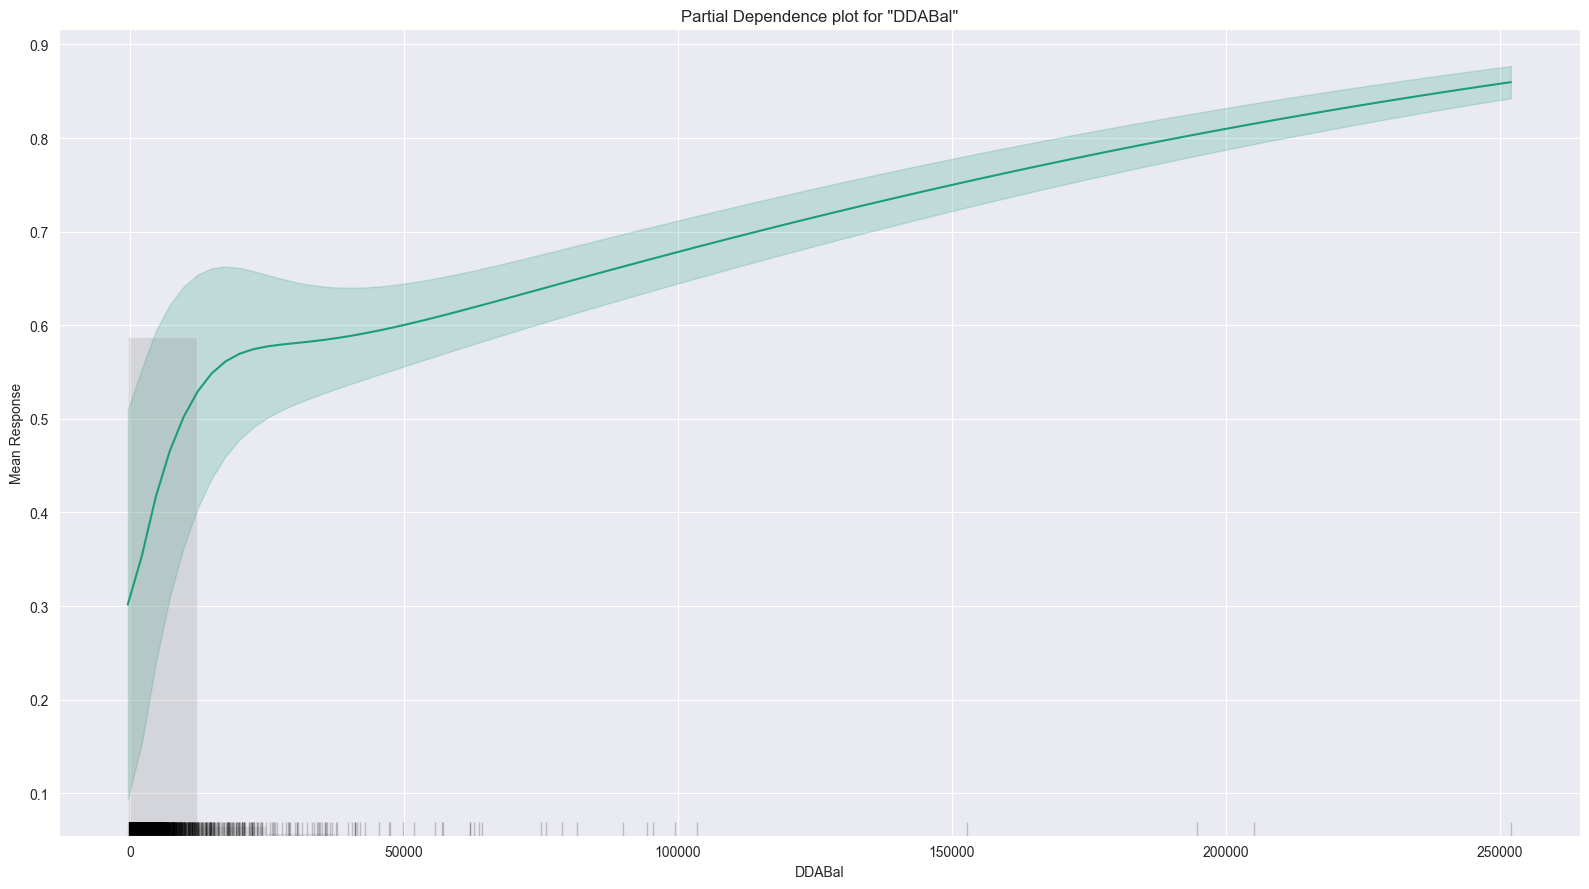

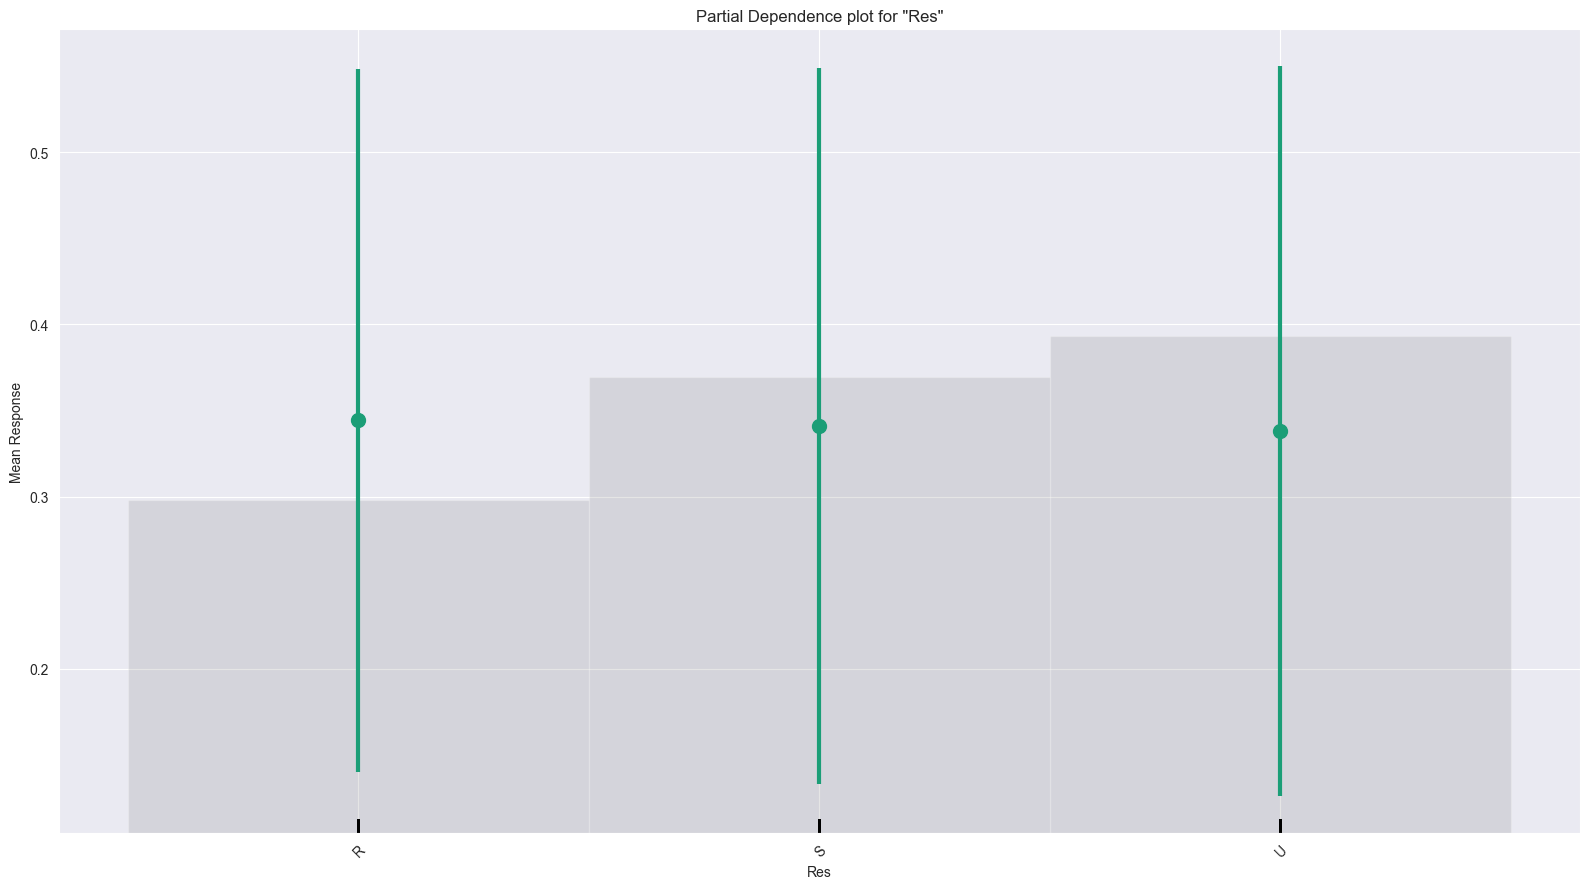

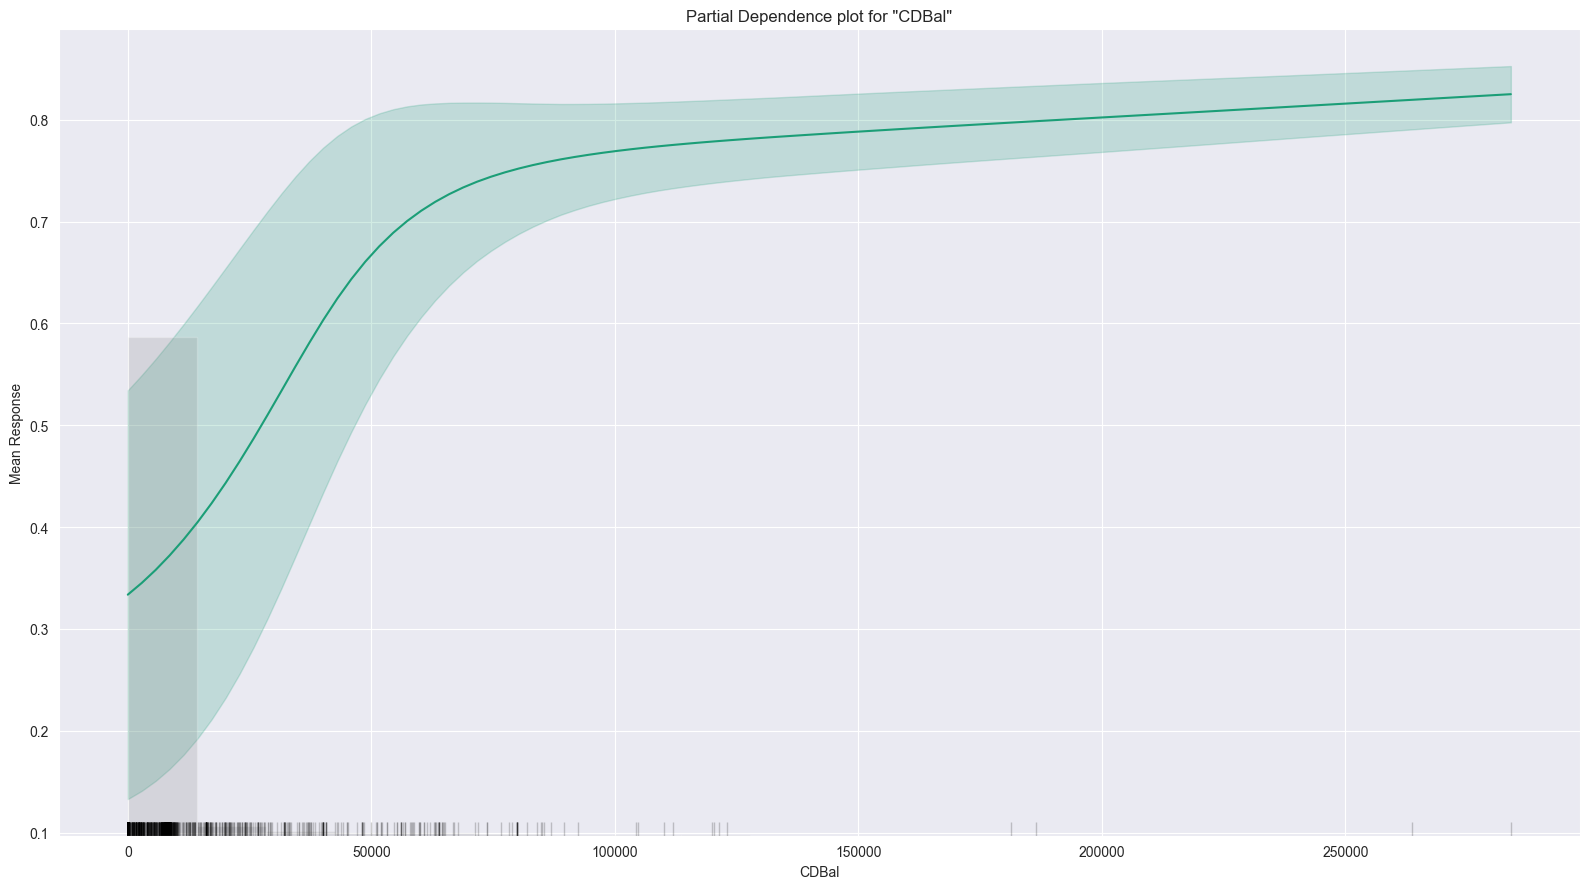

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

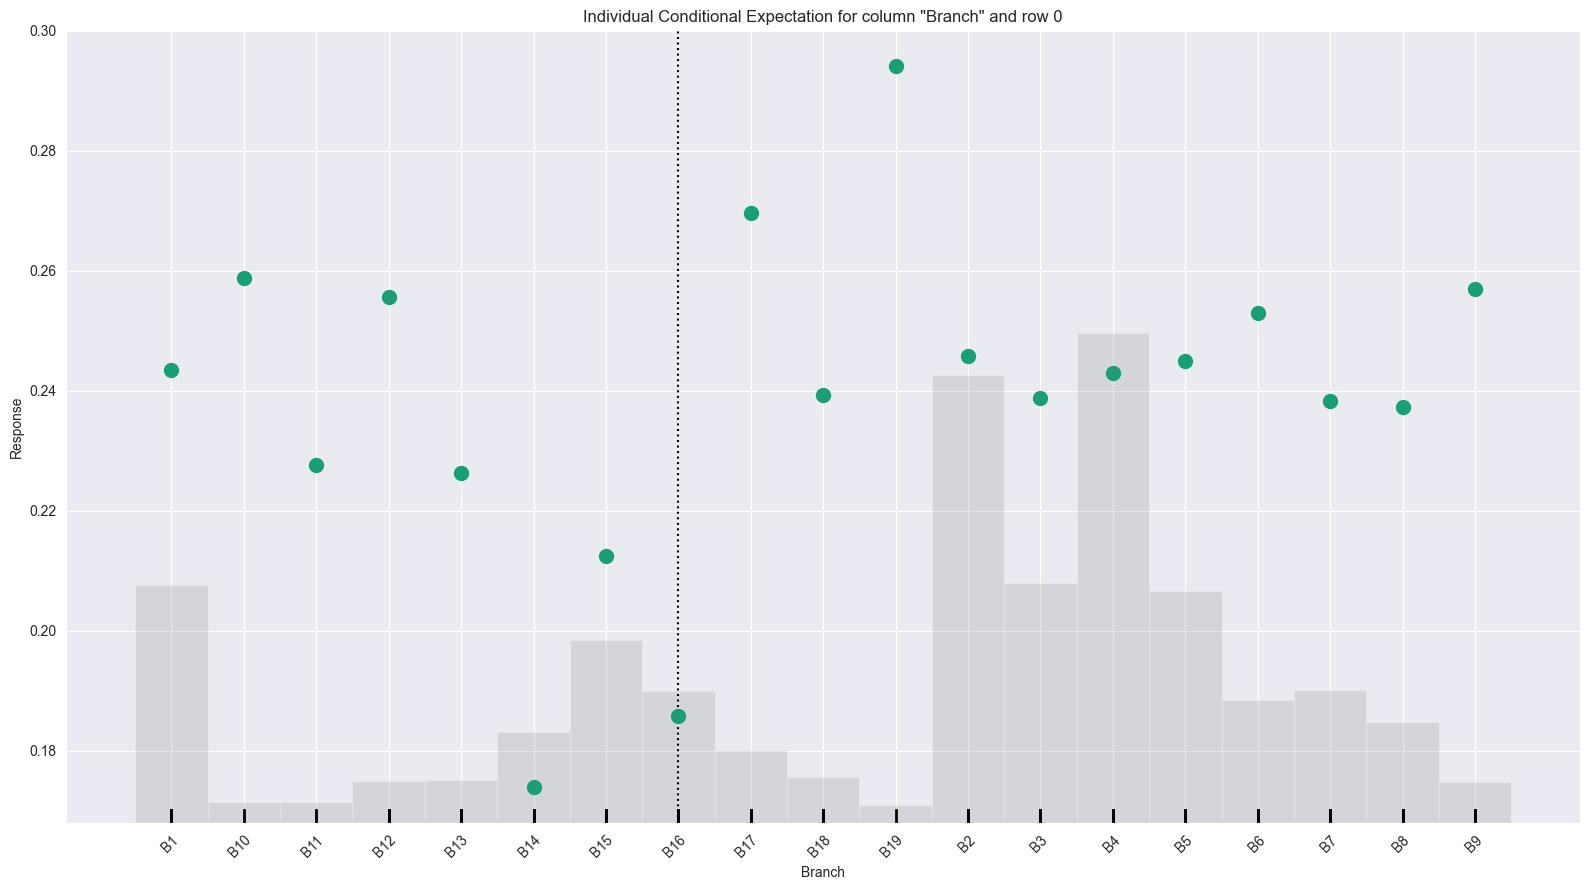

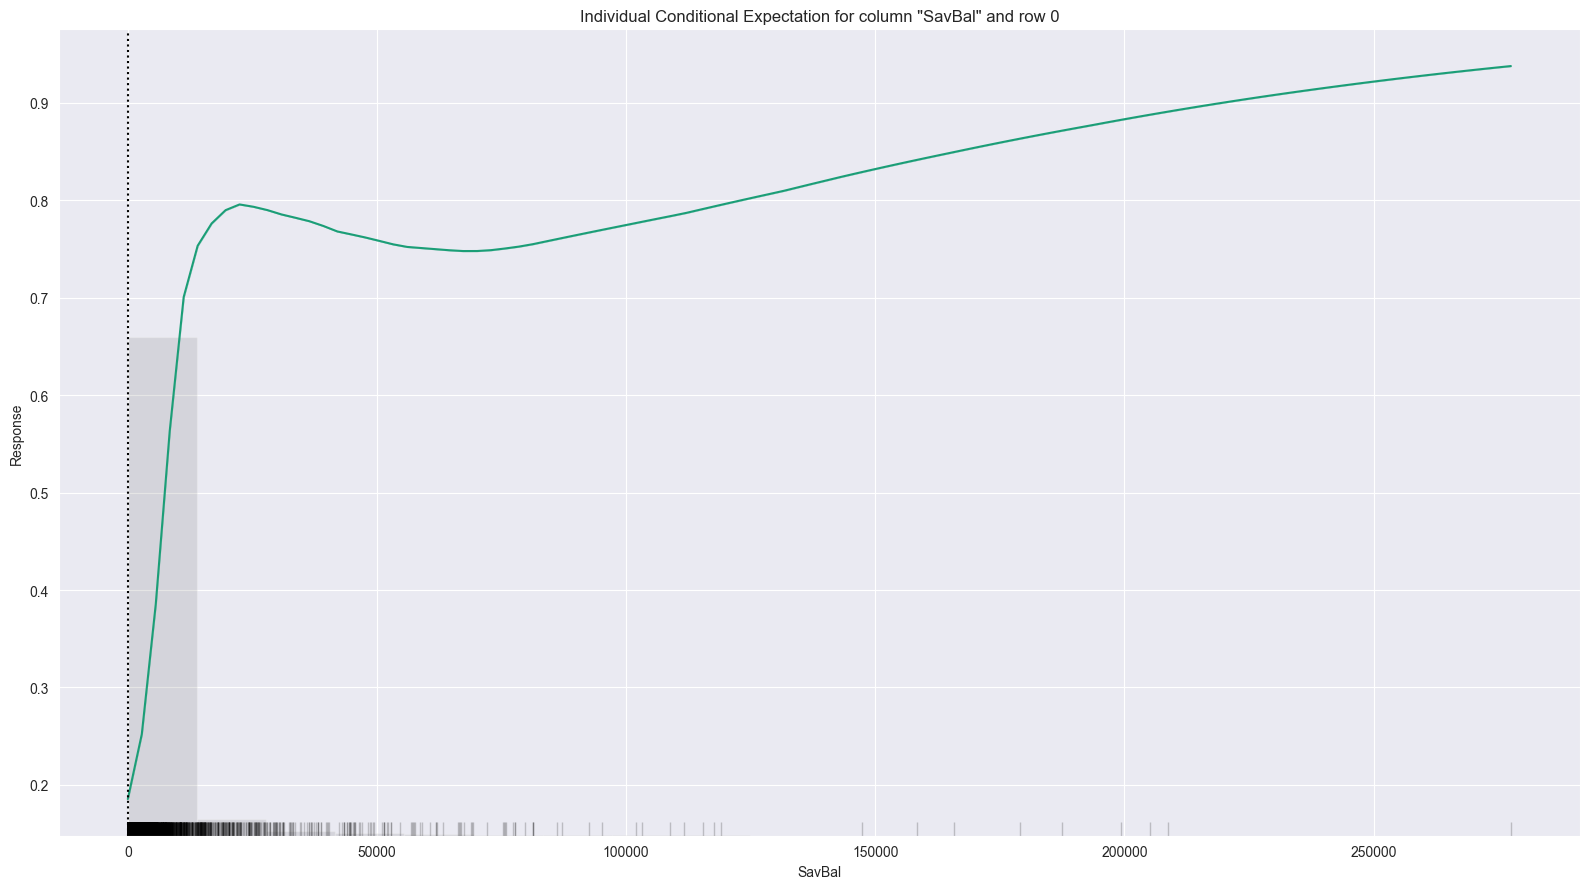

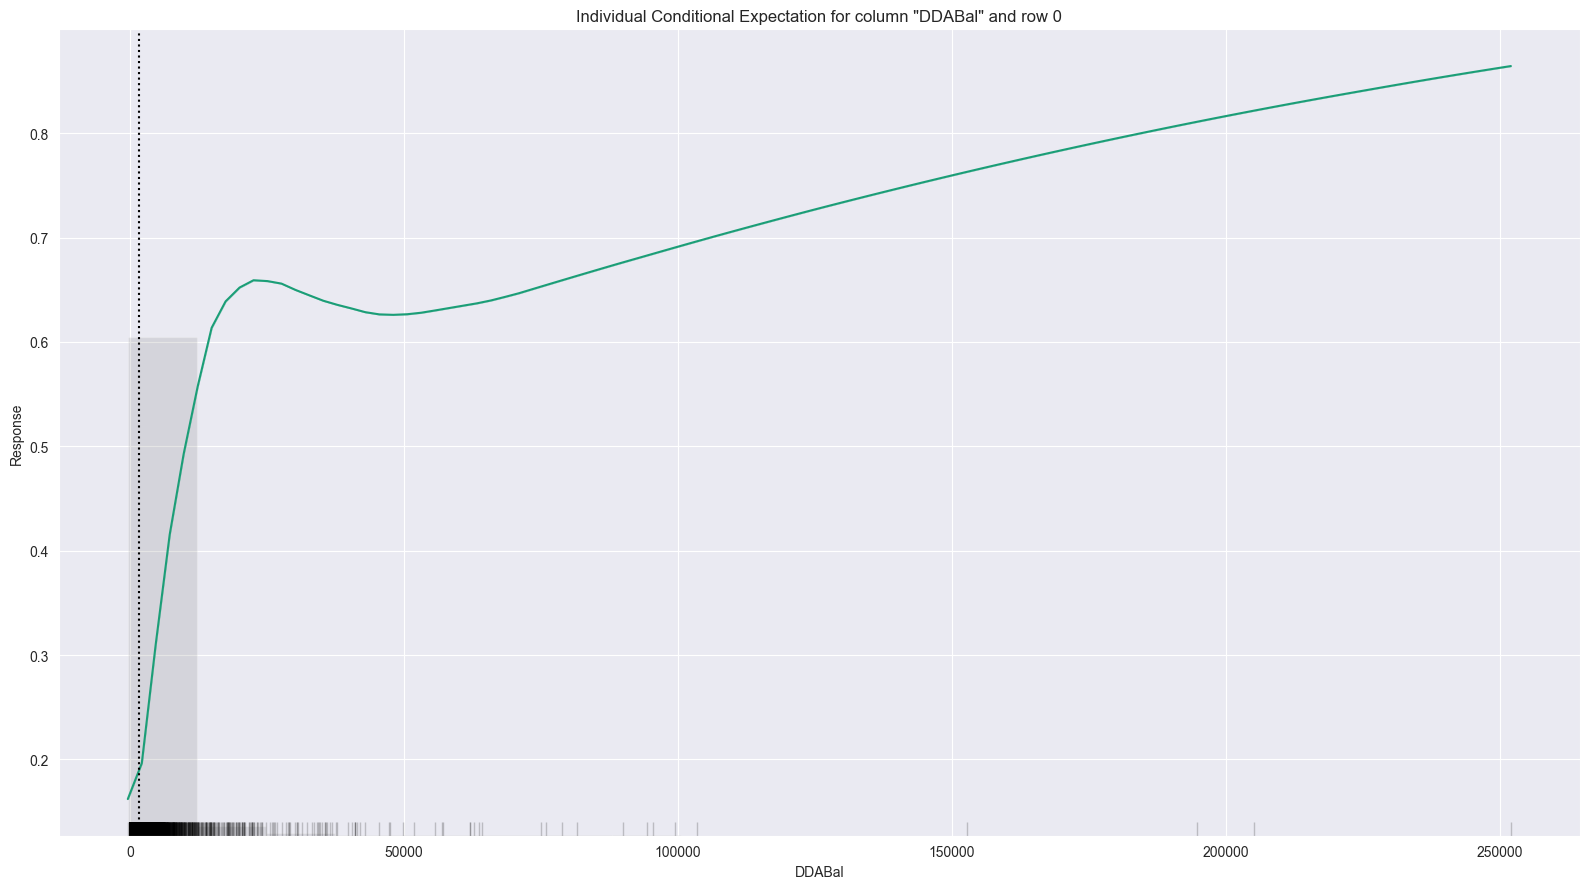

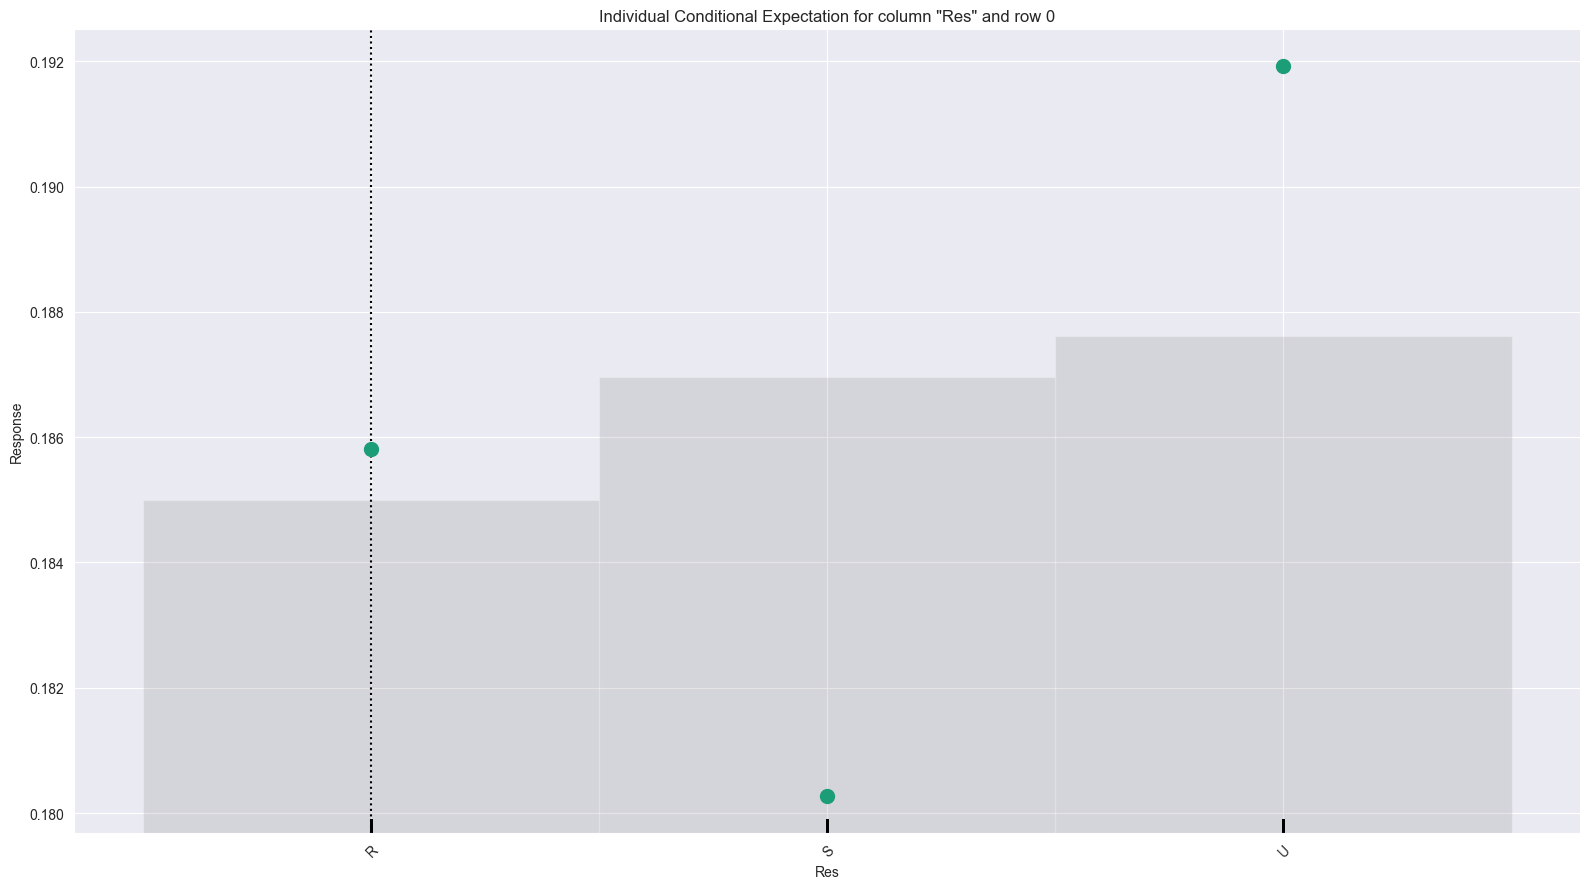

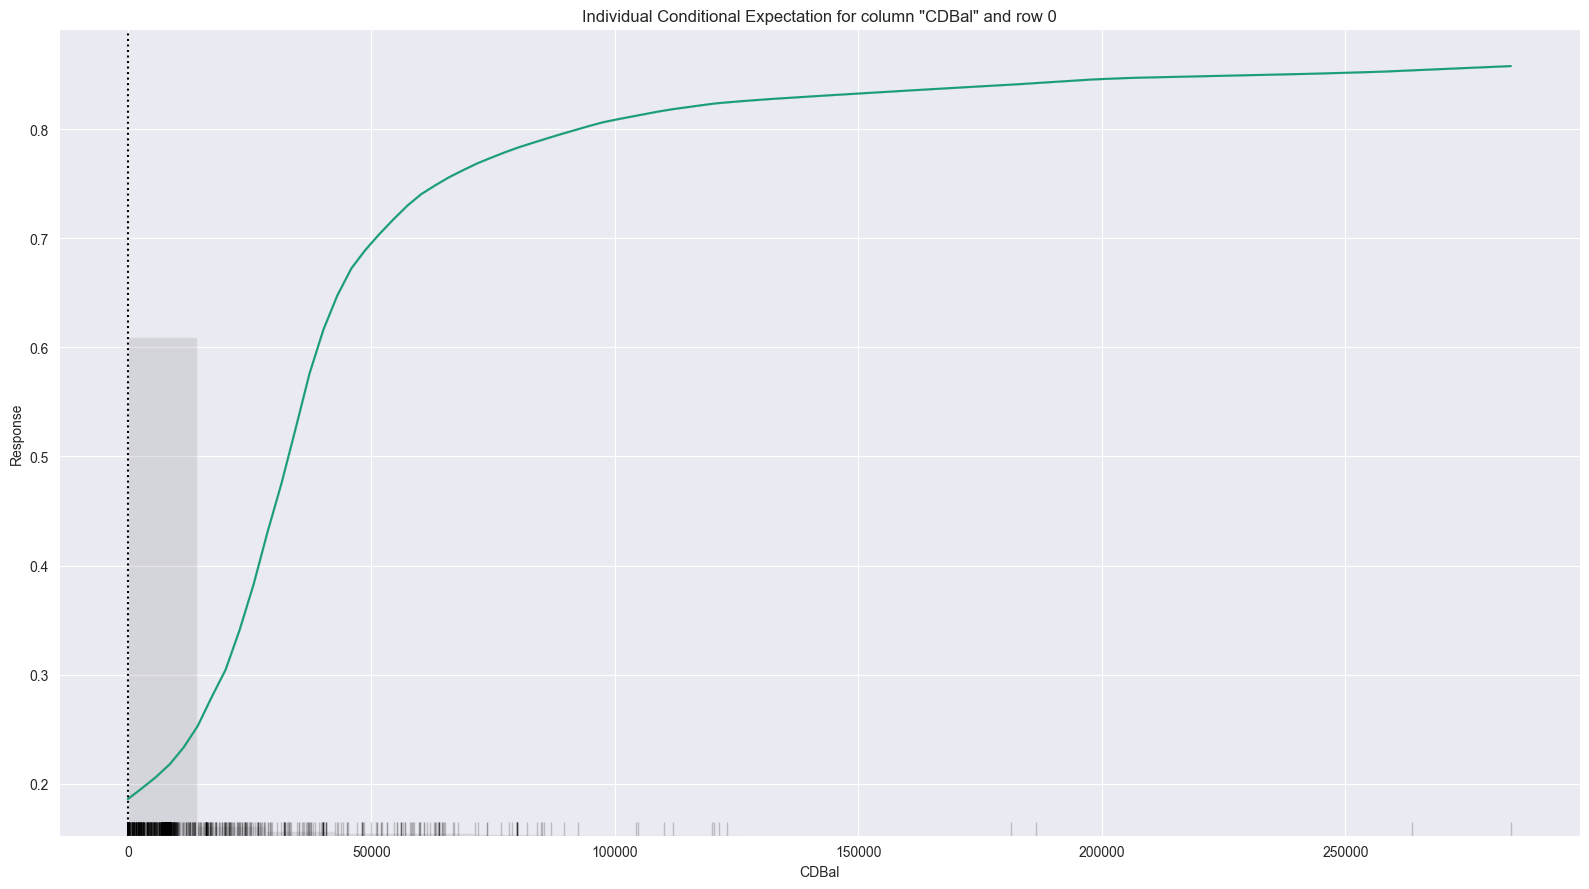

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

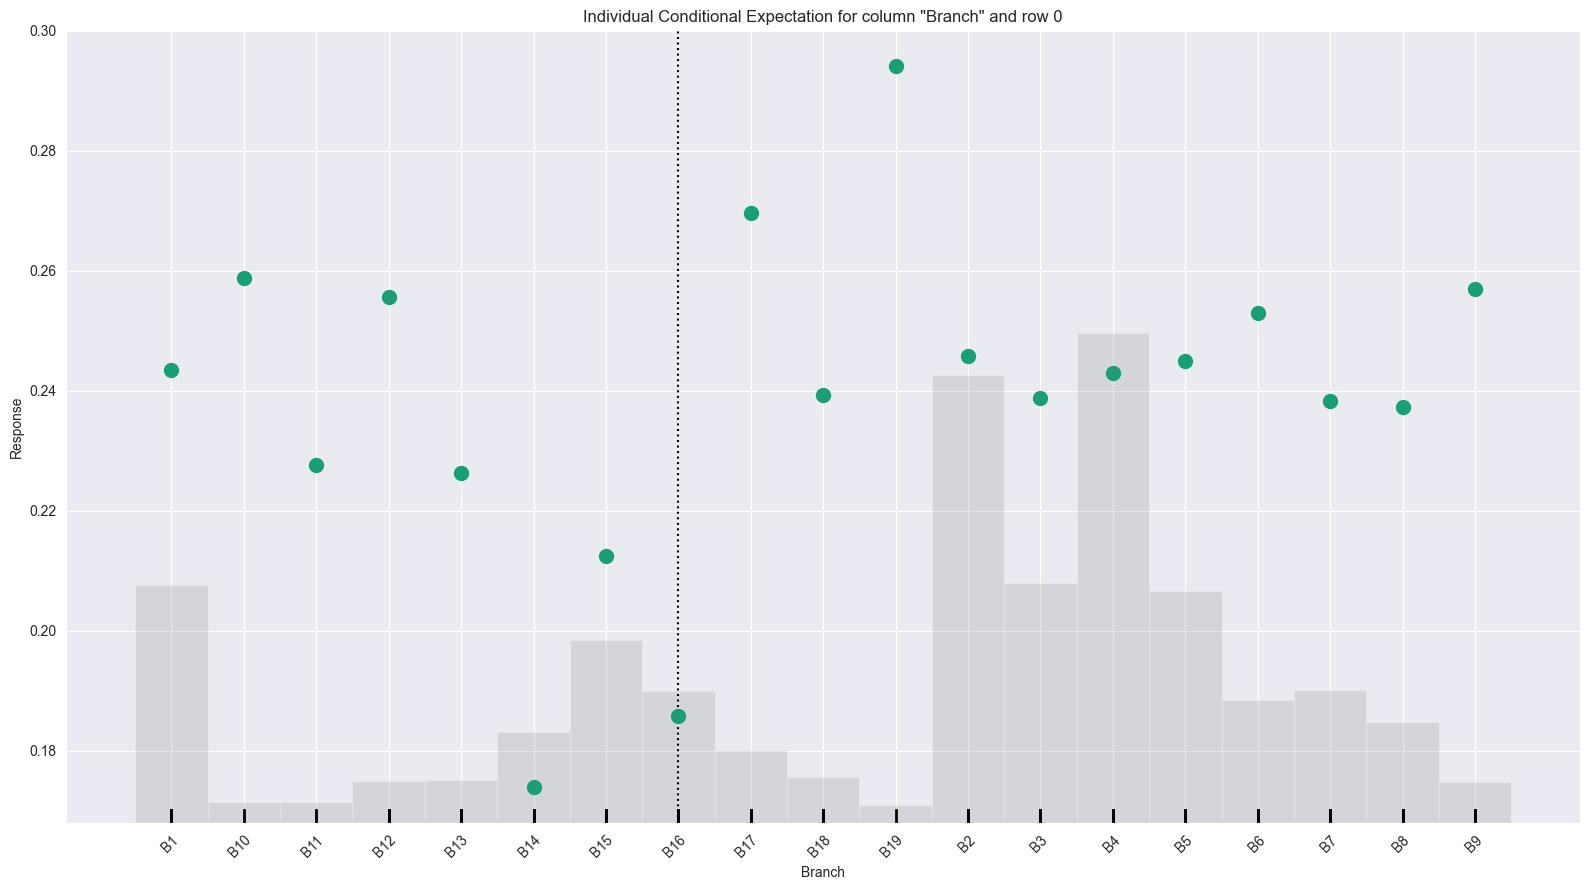

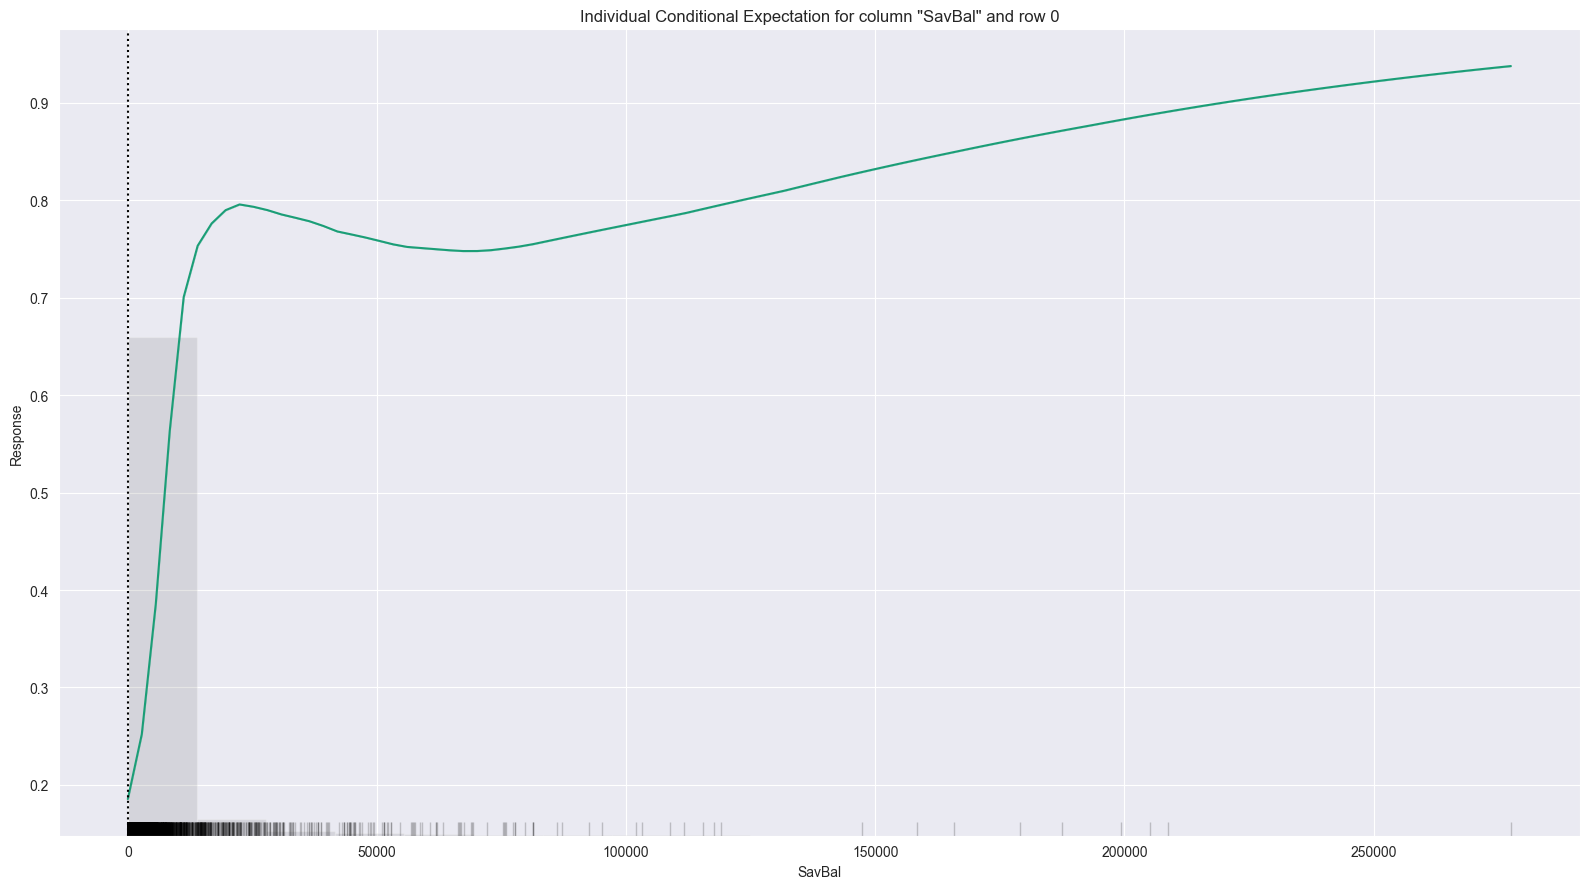

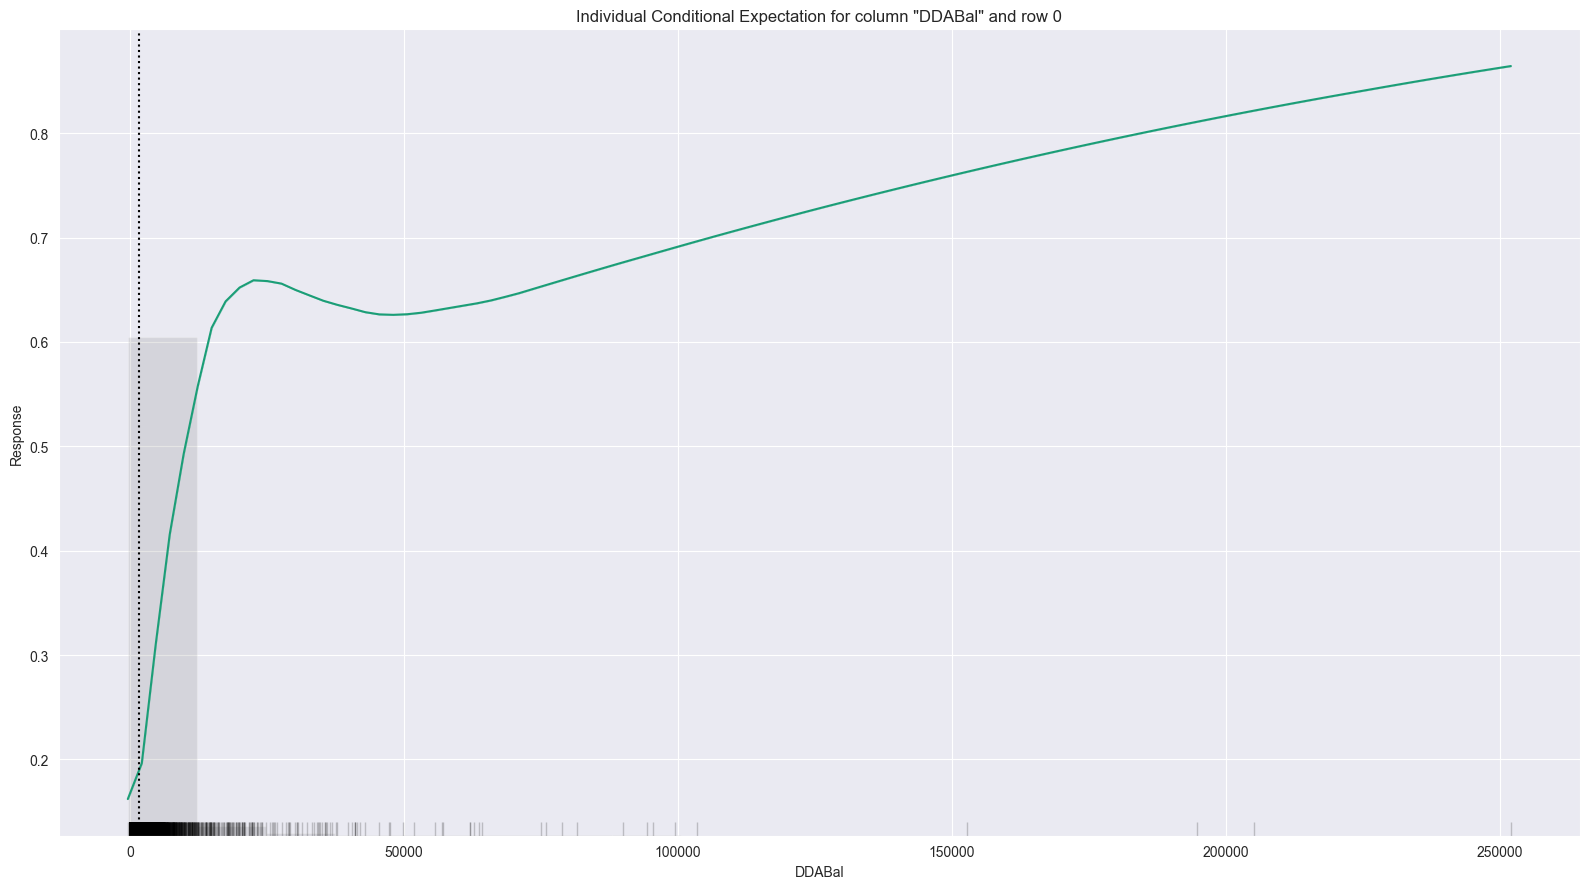

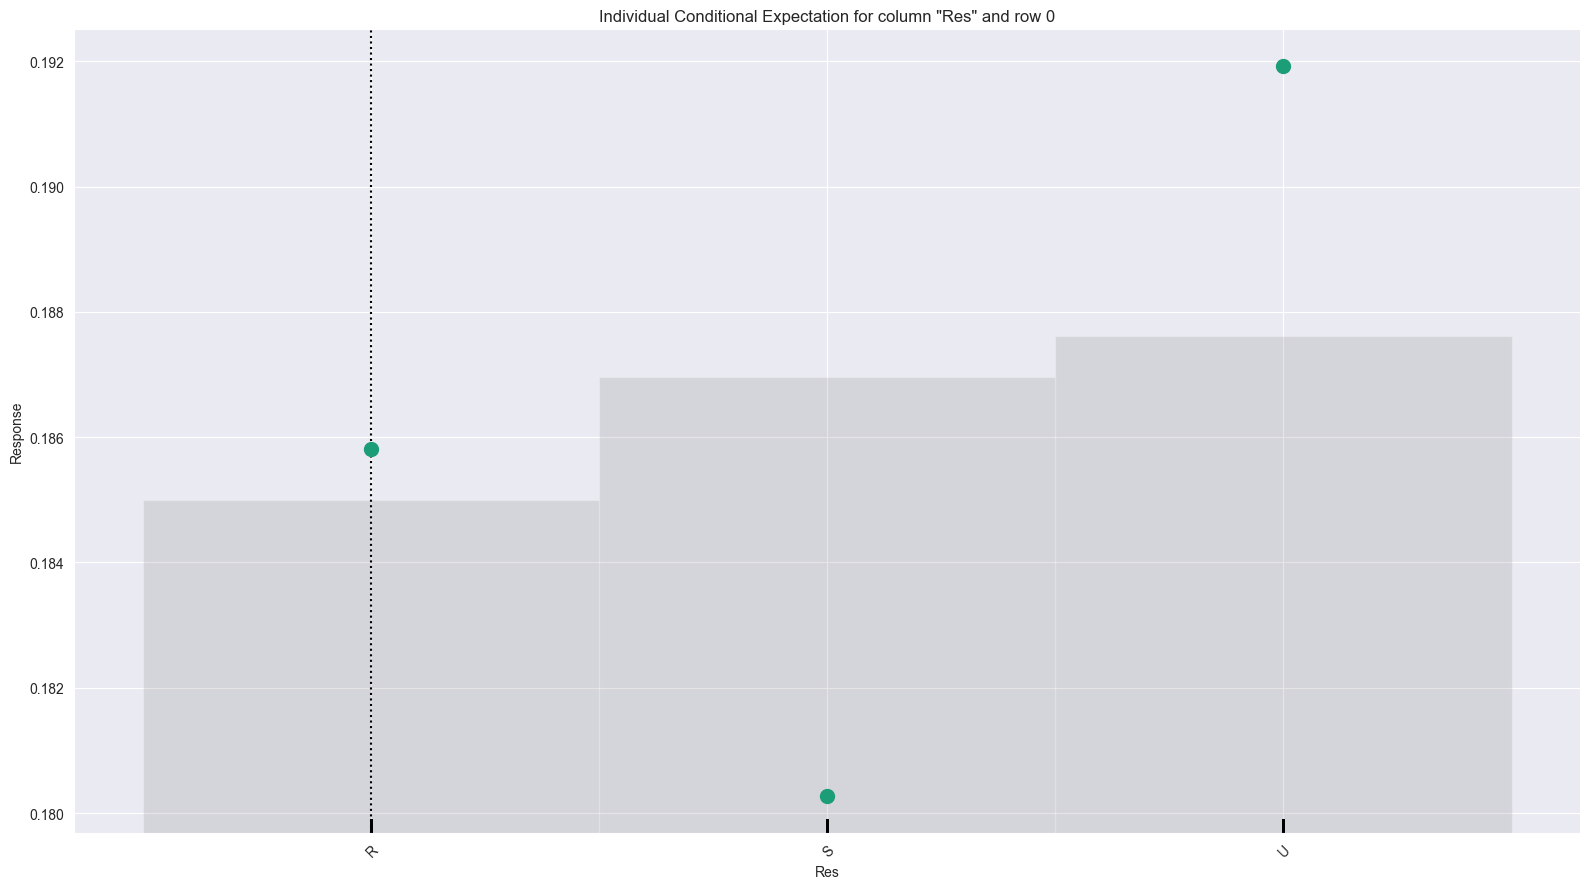

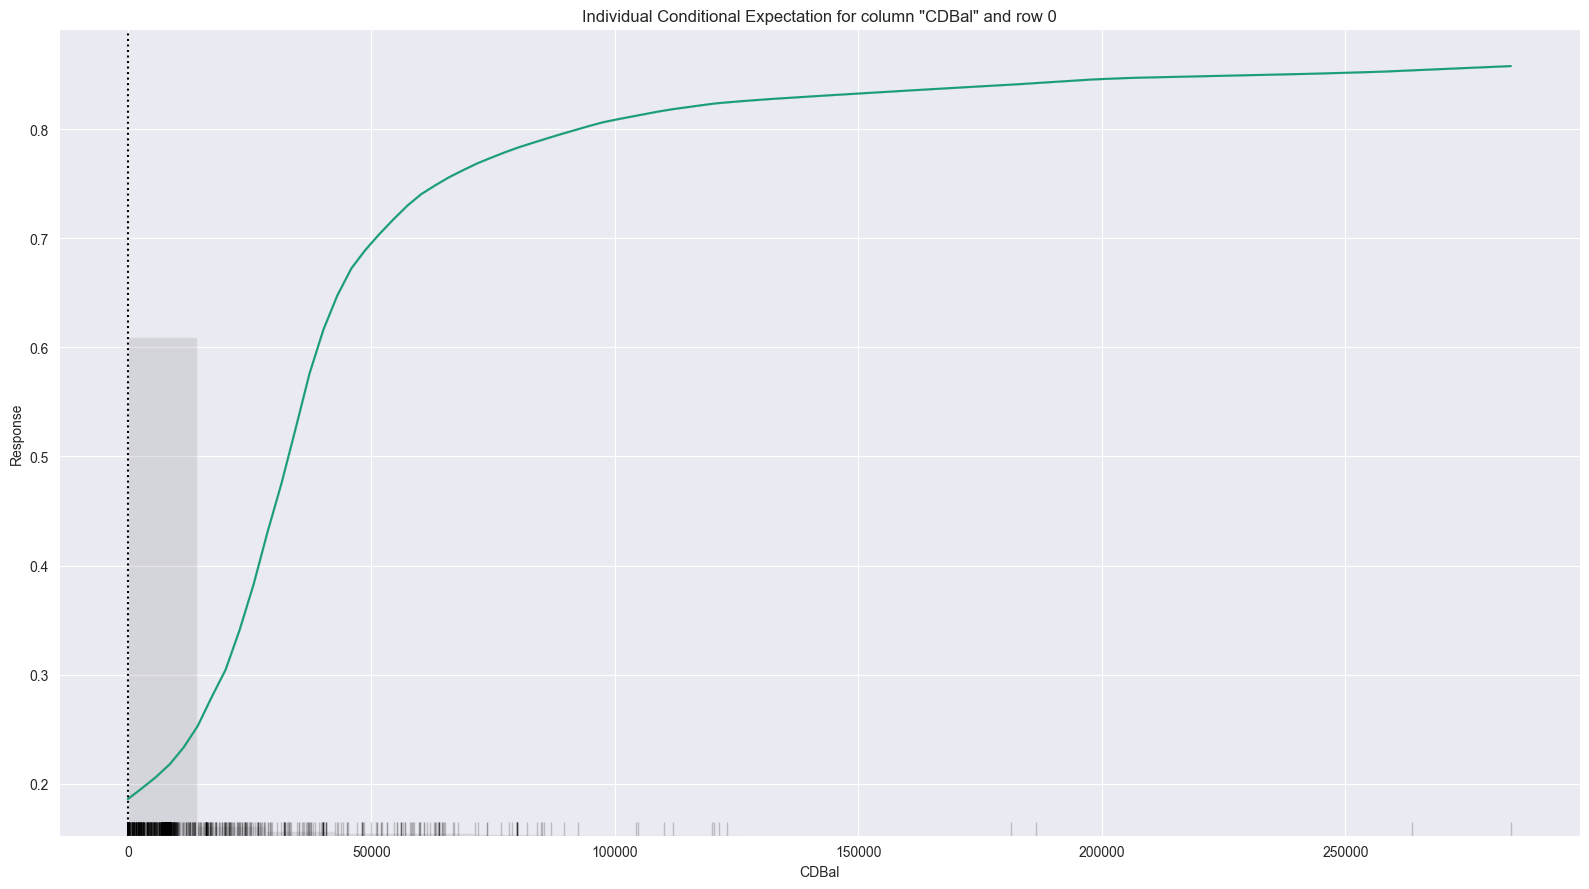

In [28]:
import h2o.explanation

# Sukurkite modelio aiškinimą su H2O Explainability funkcija
h2o.explain(dl_model, test_h2o)

# Paaiškinkite konkretų įrašą
h2o.explain_row(dl_model, test_h2o, row_index=0)

### Random Forest


In [30]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator

# Hiperparametrų rinkinį
hyper_params = {
    'ntrees': [10, 25, 50],        # Skirtingas medžių skaičius
    'max_depth': [5, 10, 30],       # Skirtingas maksimalus gylis
    'min_rows': [1, 5, 10],          # Minimalus įrašų skaičius mazge
    'sample_rate': [0.7, 0.8, 0.9],  # Pavyzdžių atrankos norma
    'mtries': [3, 5, 10]             # Požymių skaičius, atrinktas kiekvienam medžiui (naudokite -1 visiems požymiams)
}

# Sukuriame „Random Forest“ modelį su H2OGridSearch
grid_search = H2OGridSearch(
    model=H2ORandomForestEstimator(seed=42),
    hyper_params=hyper_params,
    search_criteria={
        "strategy": "Cartesian"  # Išbandys kiekvieną kombinaciją, galima naudoti „RandomDiscrete“ greitesniam paieškojimui
    }
)

# Peliedizame tinklelio paiešką
grid_search.train(x=x, y=y, training_frame=train_h2o, validation_frame=test_h2o)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,min_rows,mtries,ntrees,sample_rate,model_ids,logloss
,30.0,10.0,10.0,50.0,0.7,Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_81,0.5013702
,30.0,10.0,10.0,50.0,0.8,Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_162,0.5029102
,30.0,5.0,10.0,50.0,0.9,Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_240,0.5030242
,30.0,10.0,10.0,50.0,0.9,Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_243,0.5030324
,30.0,5.0,10.0,50.0,0.8,Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_159,0.5035420
,30.0,10.0,10.0,25.0,0.7,Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_54,0.5043233
,30.0,5.0,10.0,25.0,0.9,Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_213,0.5054547
,30.0,10.0,10.0,25.0,0.8,Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_135,0.5057363
,30.0,5.0,10.0,50.0,0.7,Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_78,0.5064640
,30.0,10.0,10.0,25.0,0.9,Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_216,0.5068754


In [31]:
# Peržiūrėkite tinklelio paieškos rezultatus
grid_results = grid_search.get_grid(sort_by="auc", decreasing=True)
print(grid_results)

# Gaukite geriausią modelį pagal AUC
best_rf_model = grid_results.models[0]

# Išveskite geriausio modelio parametrus ir našumą
print("Best model parameters:", best_rf_model.params)
print("Best model AUC:", best_rf_model.auc())

Hyper-Parameter Search Summary: ordered by decreasing auc
     max_depth    min_rows    mtries    ntrees    sample_rate    model_ids                                                          auc
---  -----------  ----------  --------  --------  -------------  -----------------------------------------------------------------  ------------------
     30.0         10.0        10.0      50.0      0.7            Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_81   0.8109016116080757
     30.0         10.0        10.0      50.0      0.8            Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_162  0.8090291633915795
     30.0         10.0        10.0      50.0      0.9            Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_243  0.8082213439154449
     30.0         5.0         10.0      50.0      0.9            Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_240  0.8080680114943626
     10.0         5.0         10.0      50.0      0

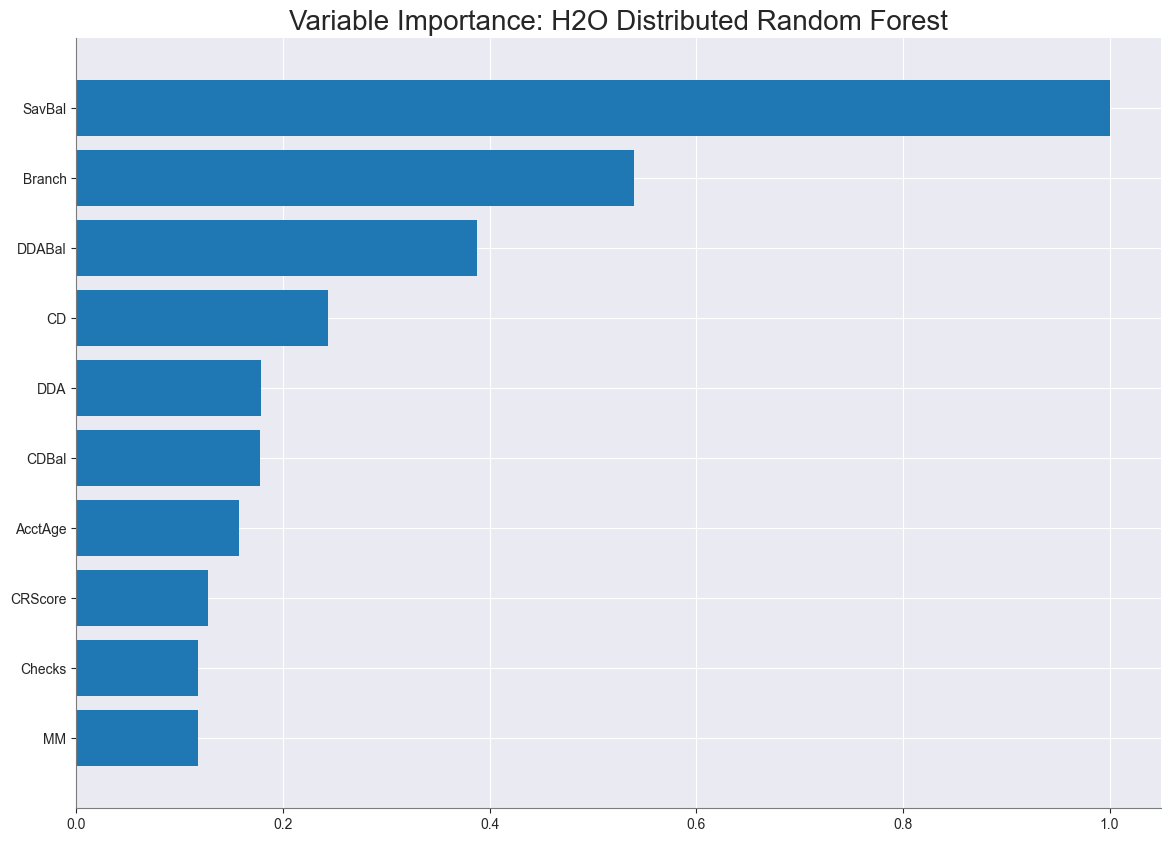

<Figure size 640x480 with 0 Axes>

In [33]:
# Sukurkite kintamųjų svarbos diagramą
best_rf_model.varimp_plot()

In [37]:
mojo_path = best_rf_model.download_mojo(path=os.getcwd(), get_genmodel_jar=False)
print("MOJO path:", mojo_path)

MOJO path: /Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/6 - notebooks/Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_81.zip


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_81

,0,1,Error,Rate
0,3209.0,1009.0,0.2392,(1009.0/4218.0)
1,618.0,1617.0,0.2765,(618.0/2235.0)
Total,3827.0,2626.0,0.2521,(1627.0/6453.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

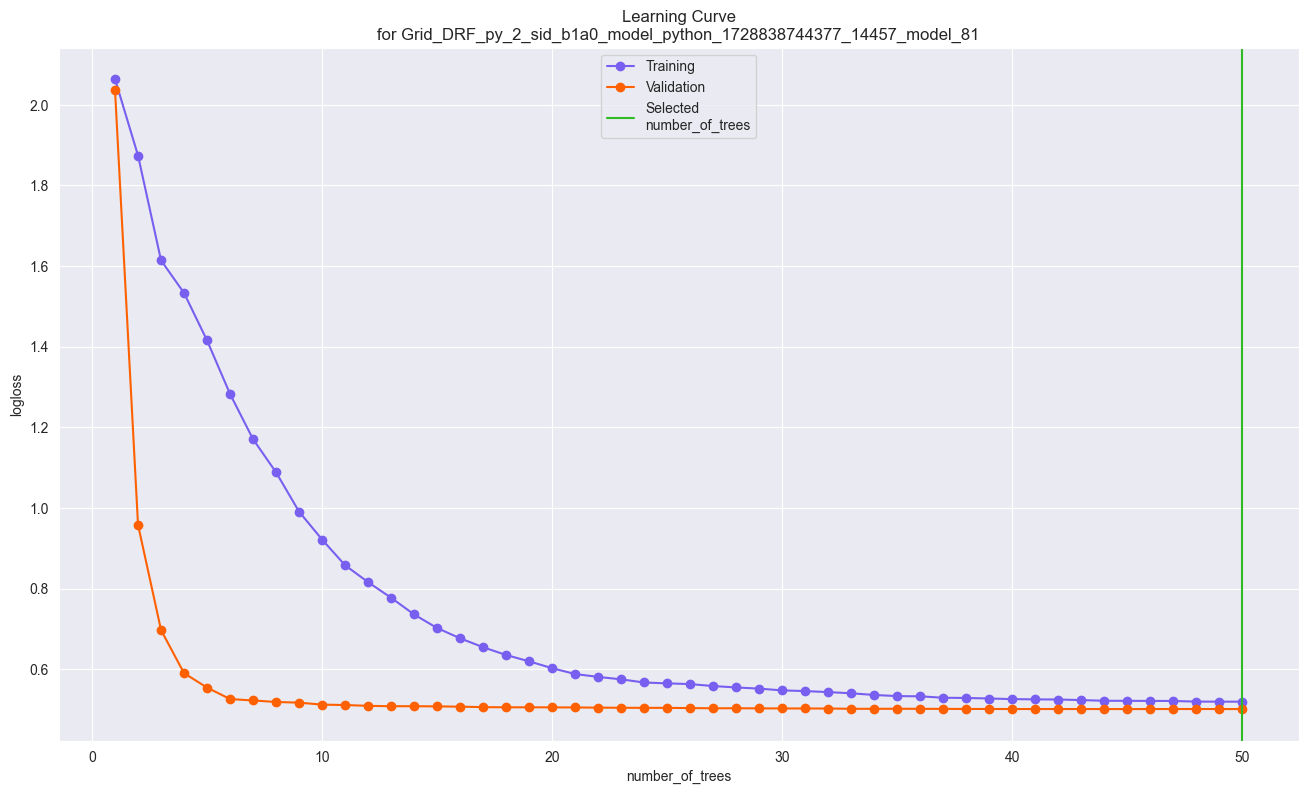

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

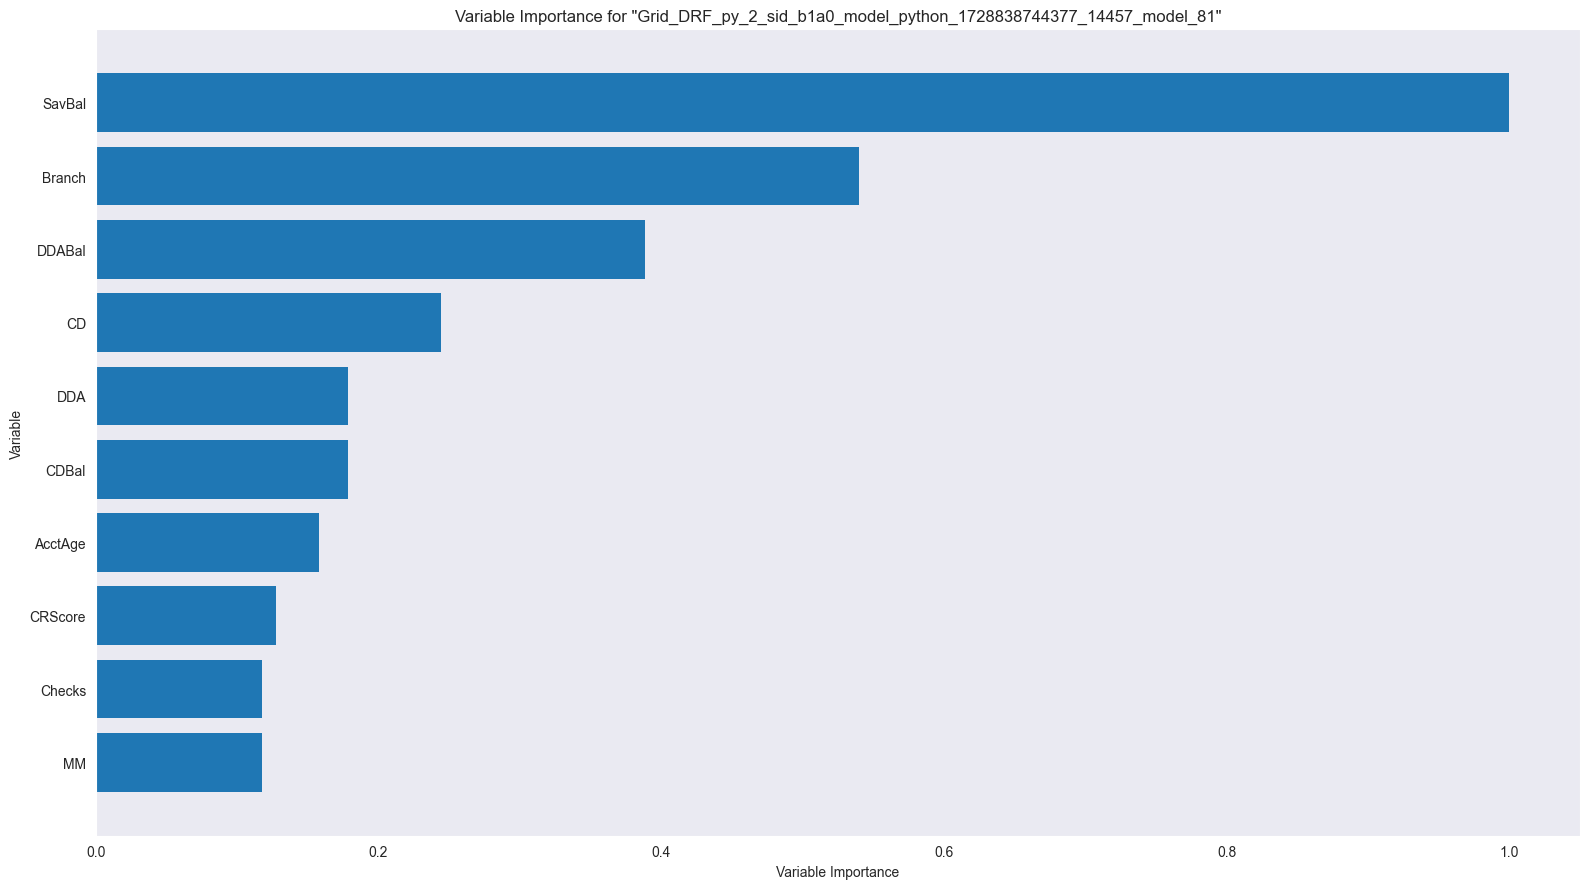

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

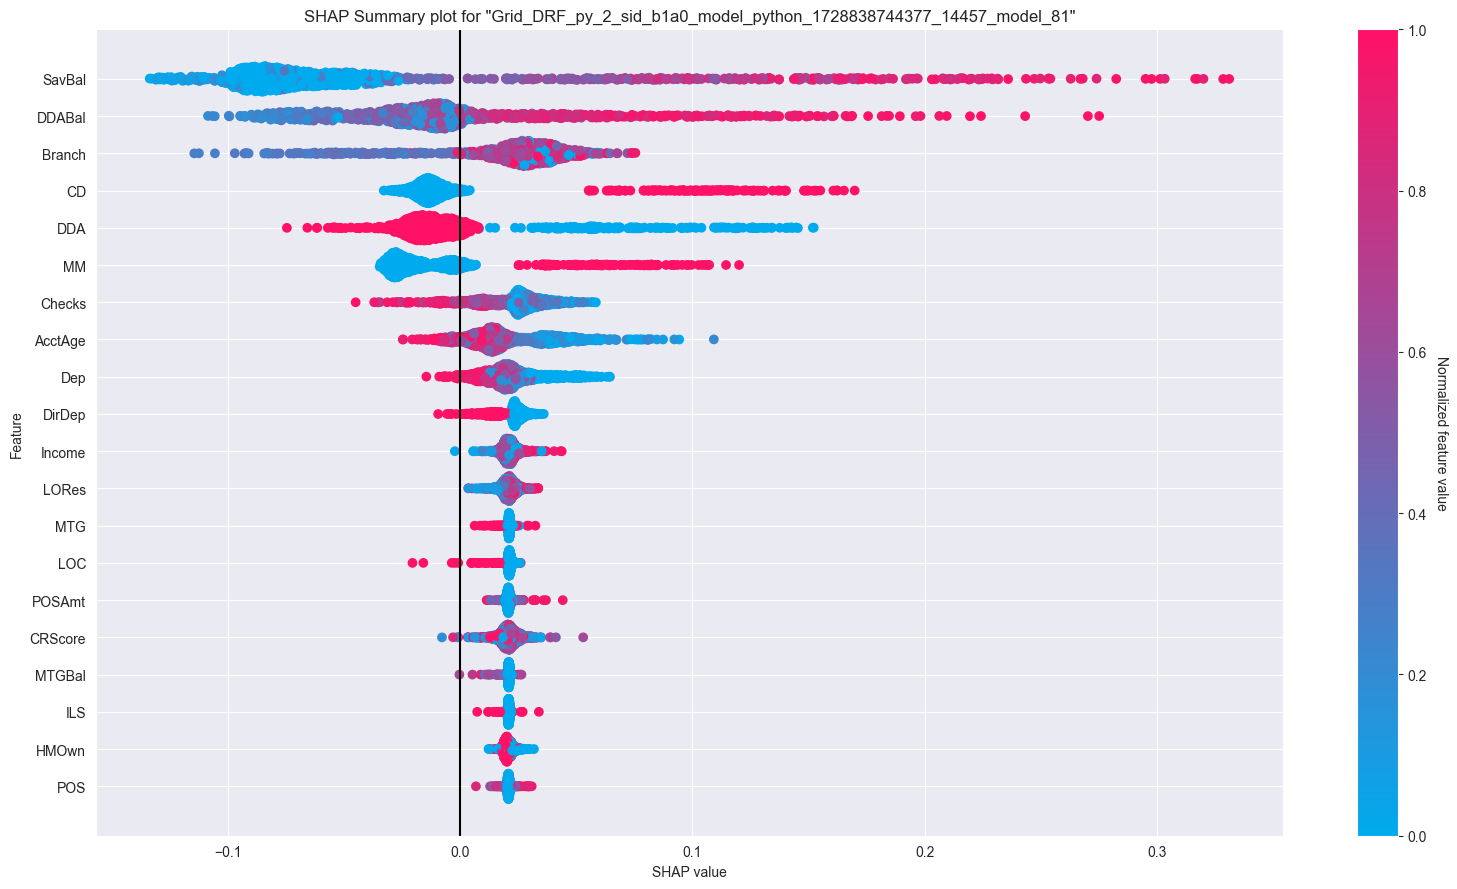

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

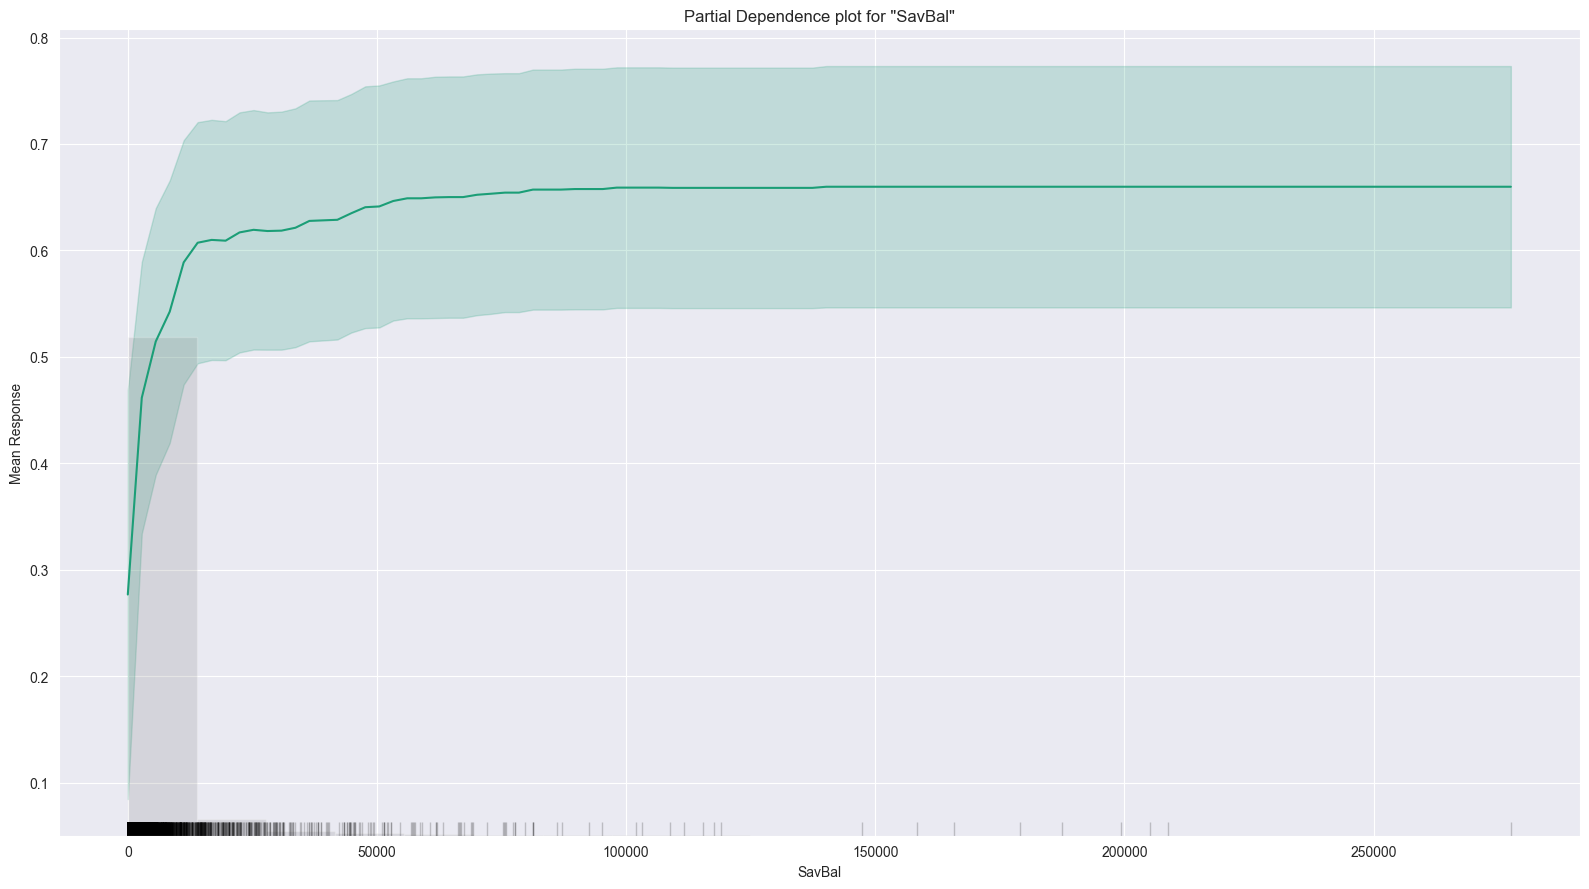

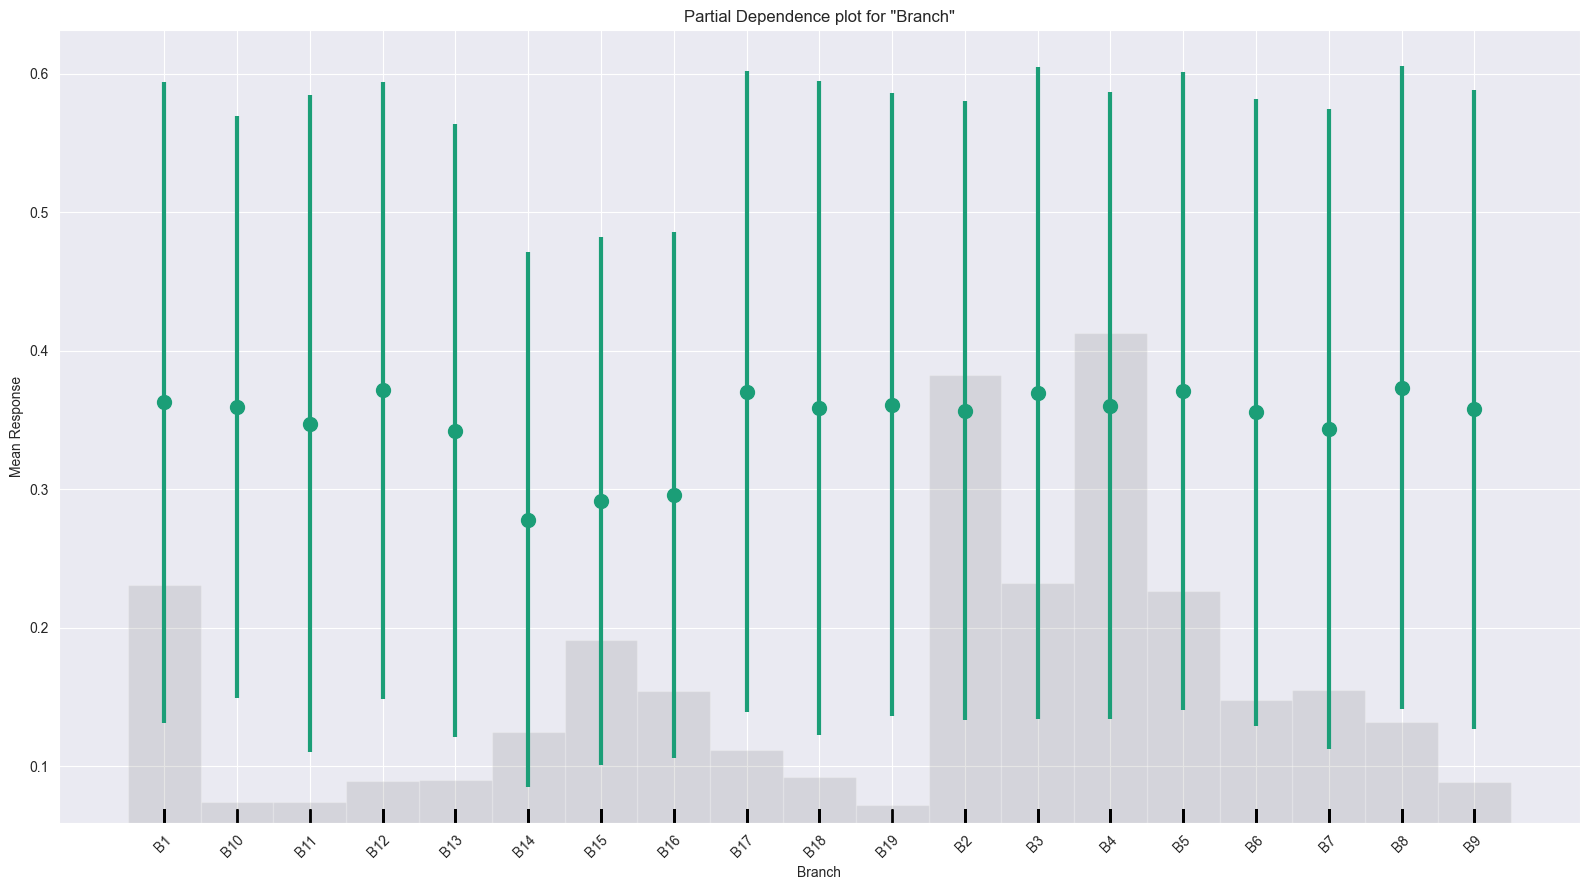

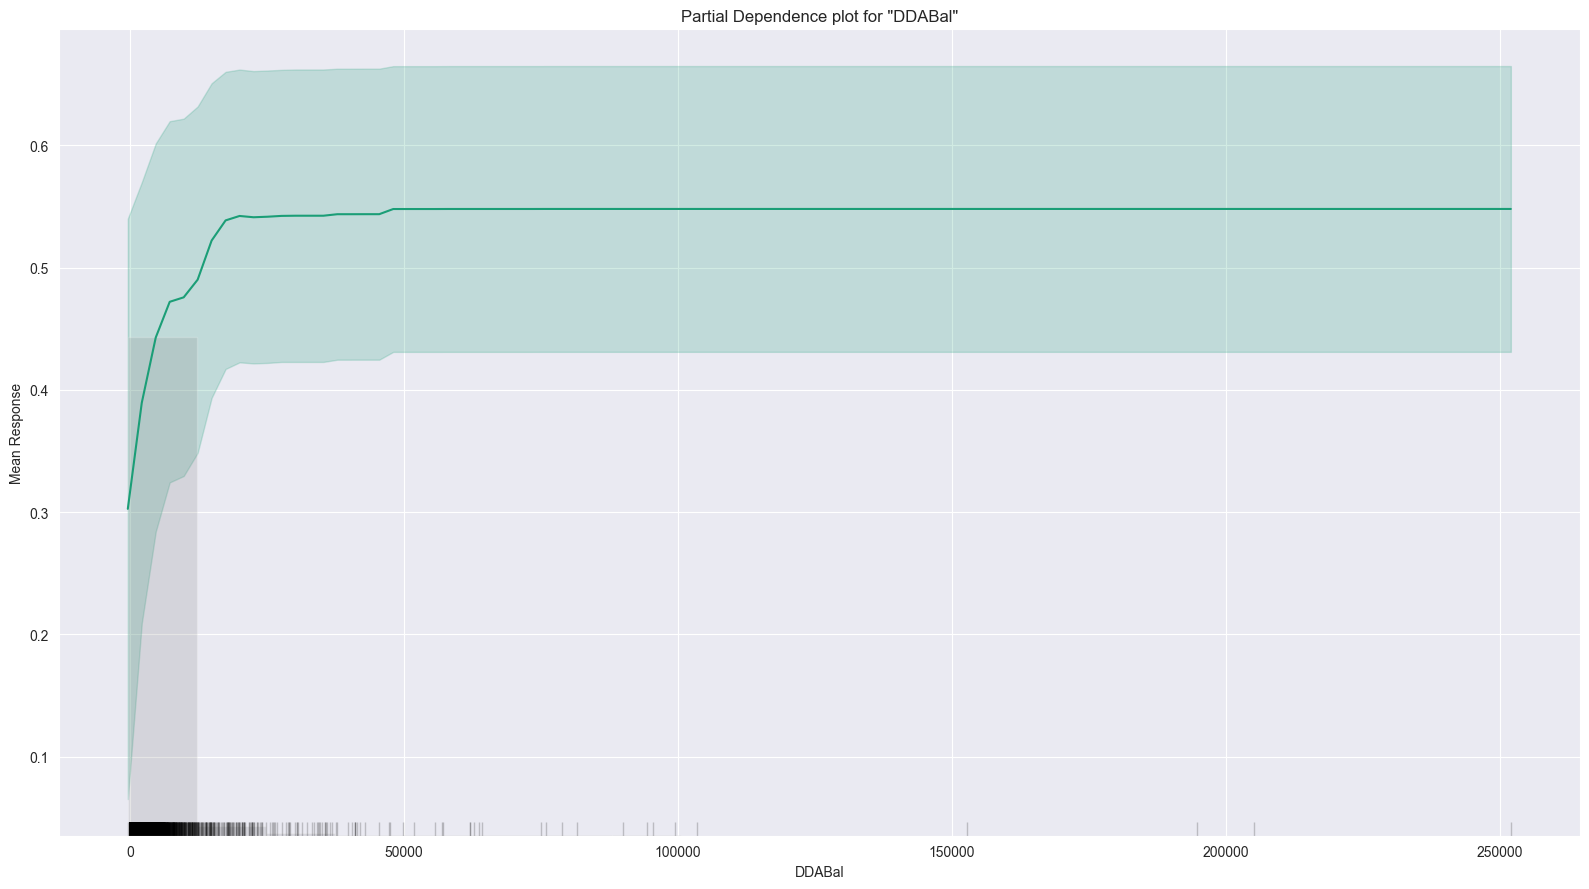

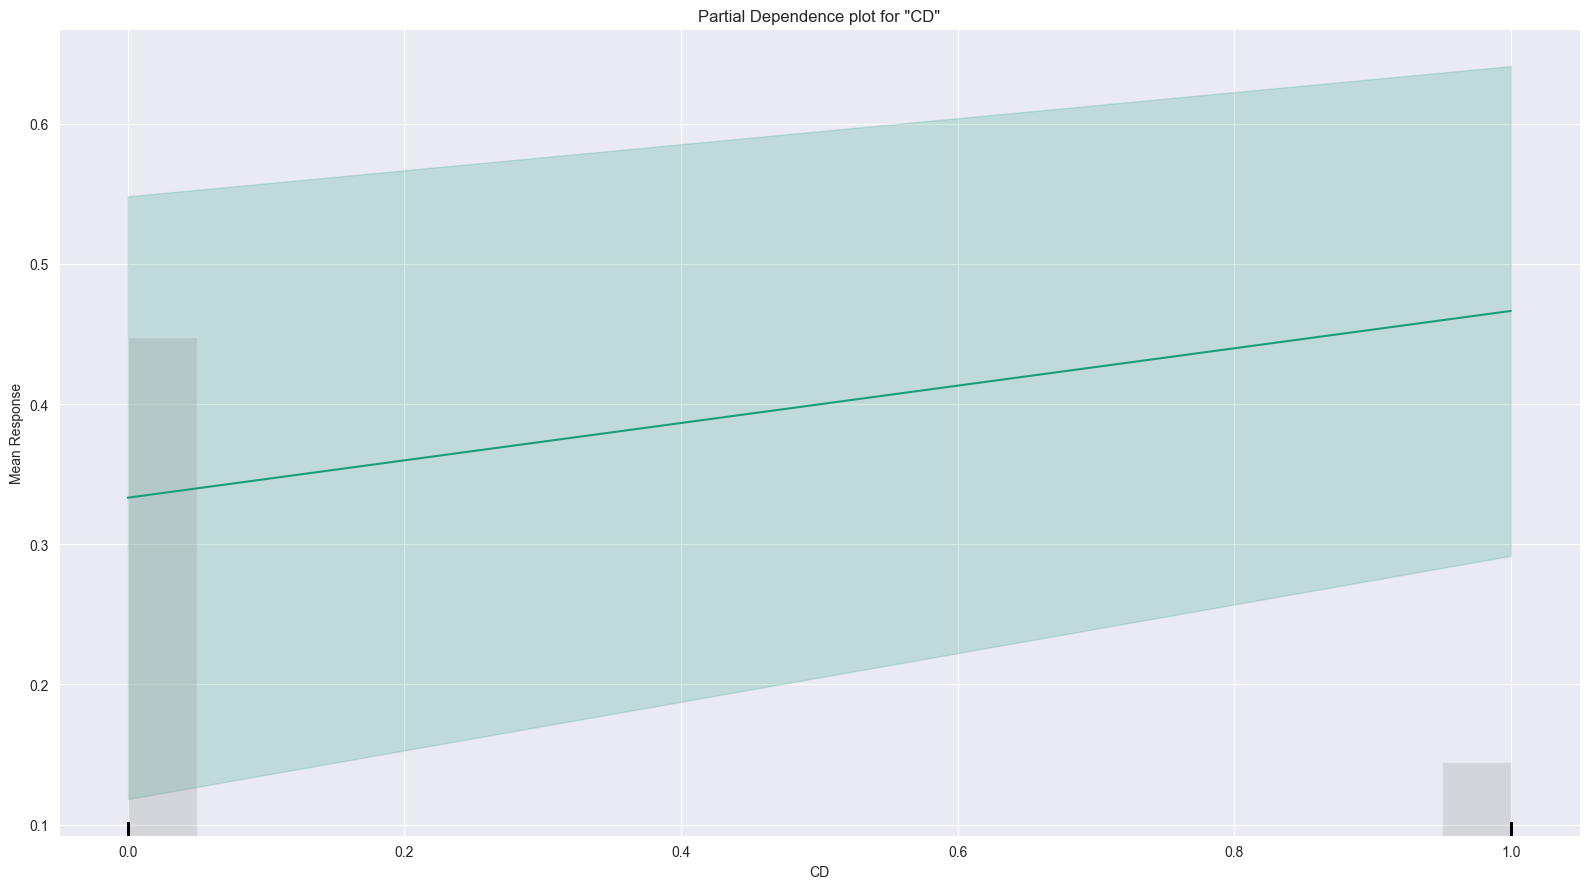

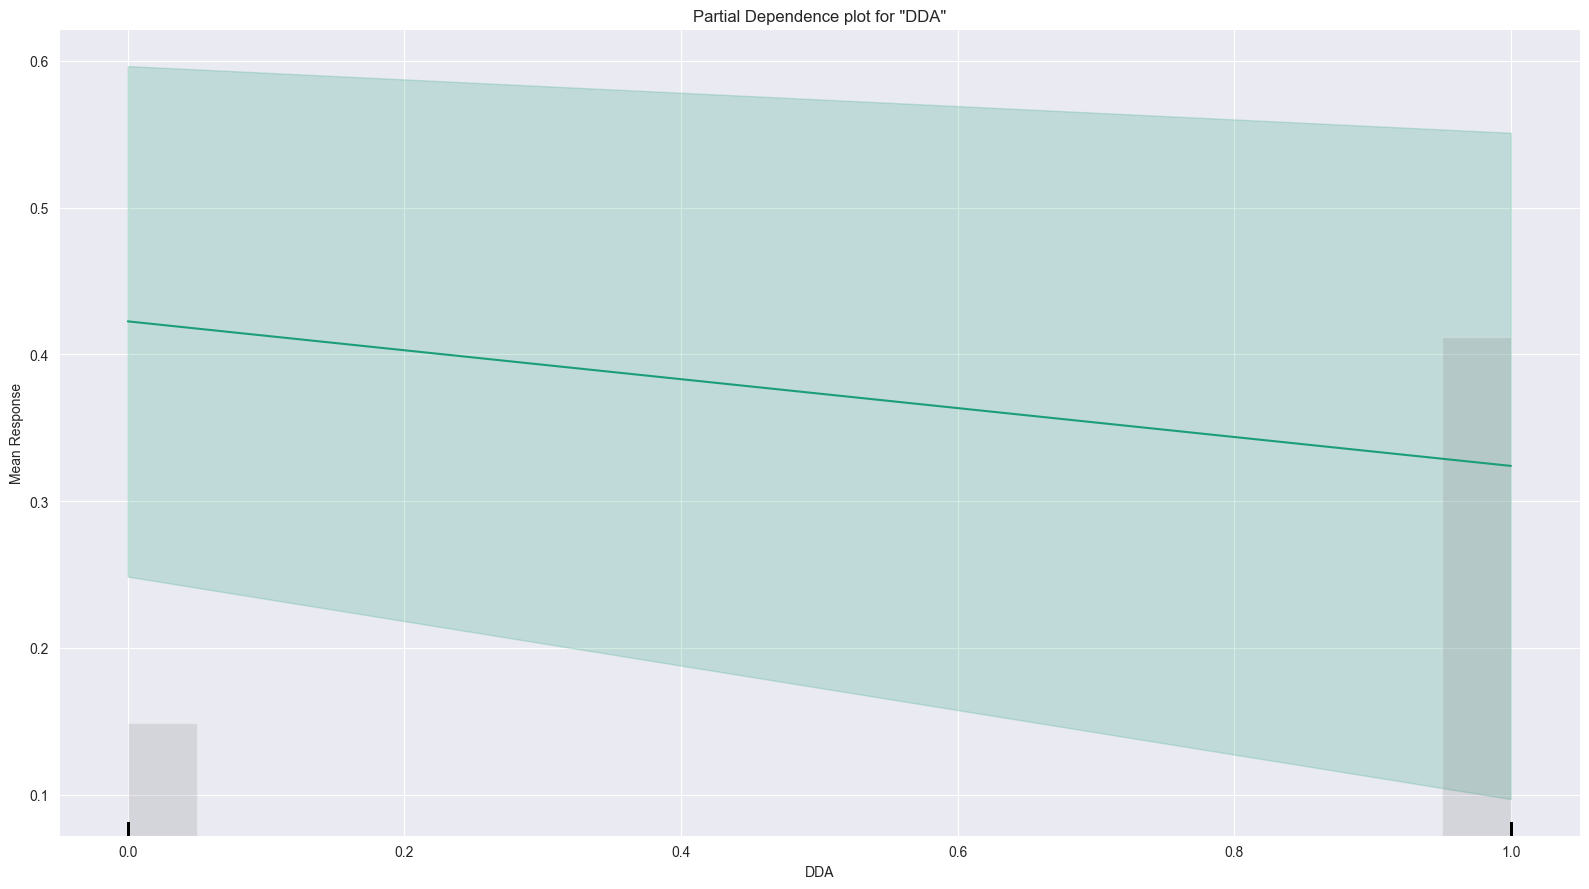

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

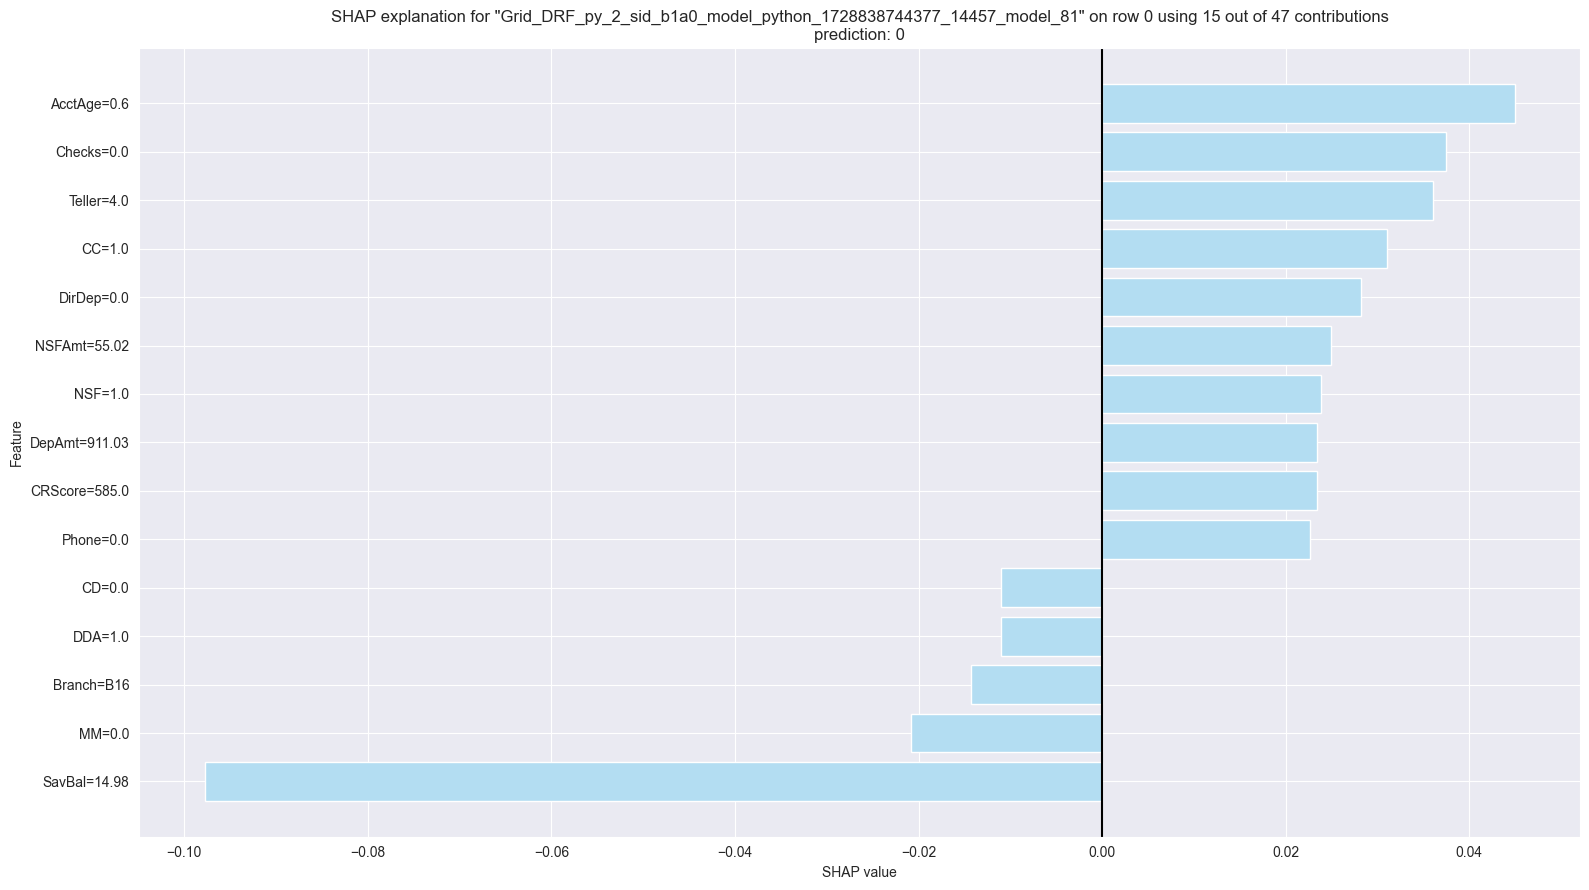

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

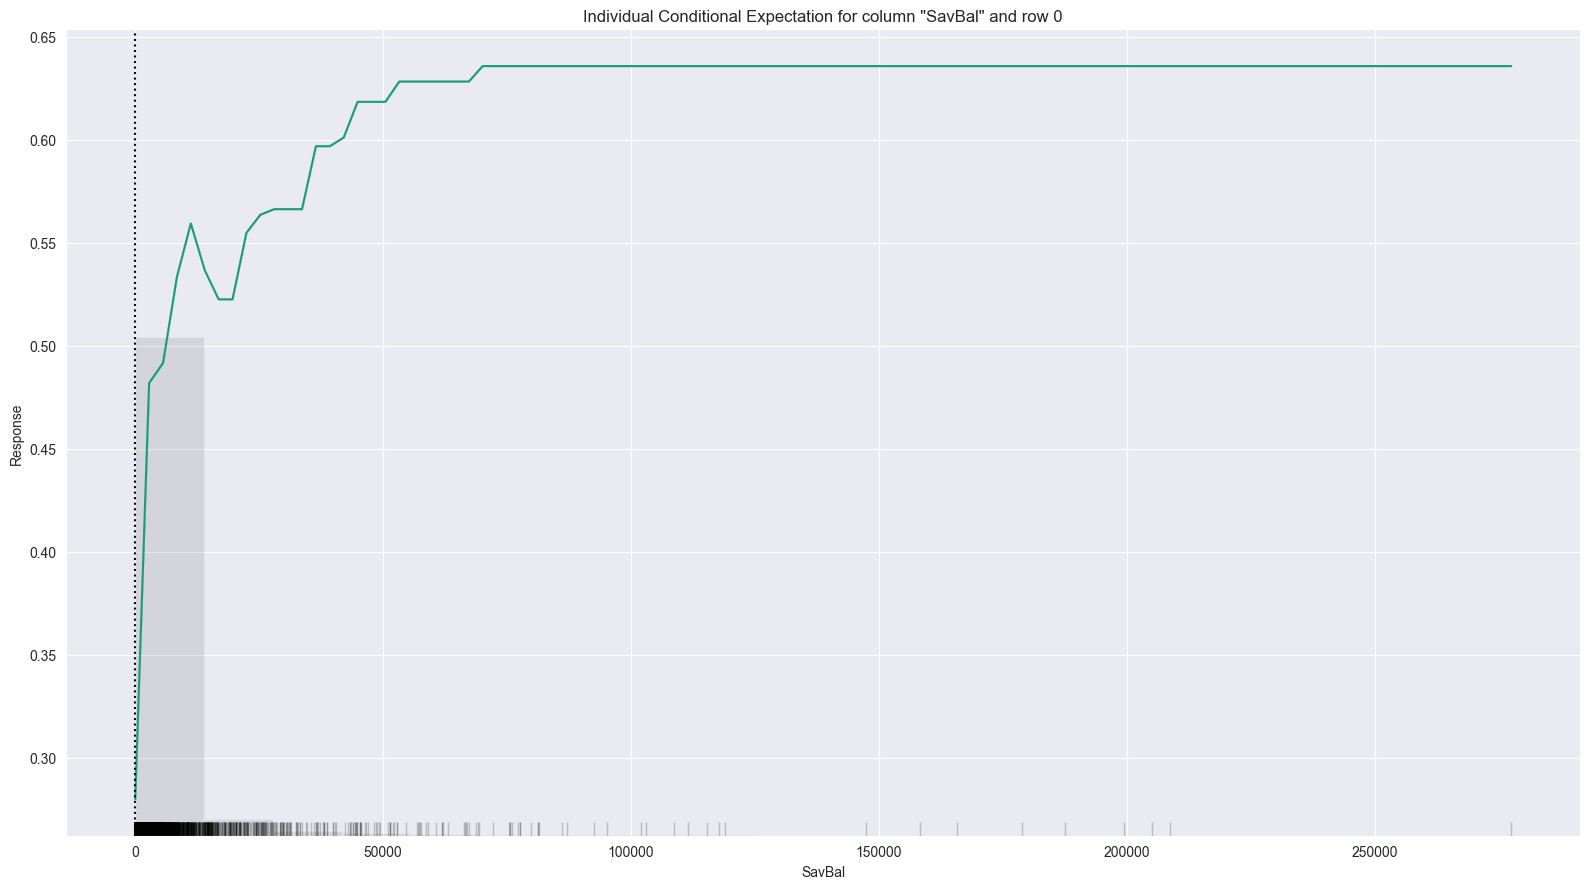

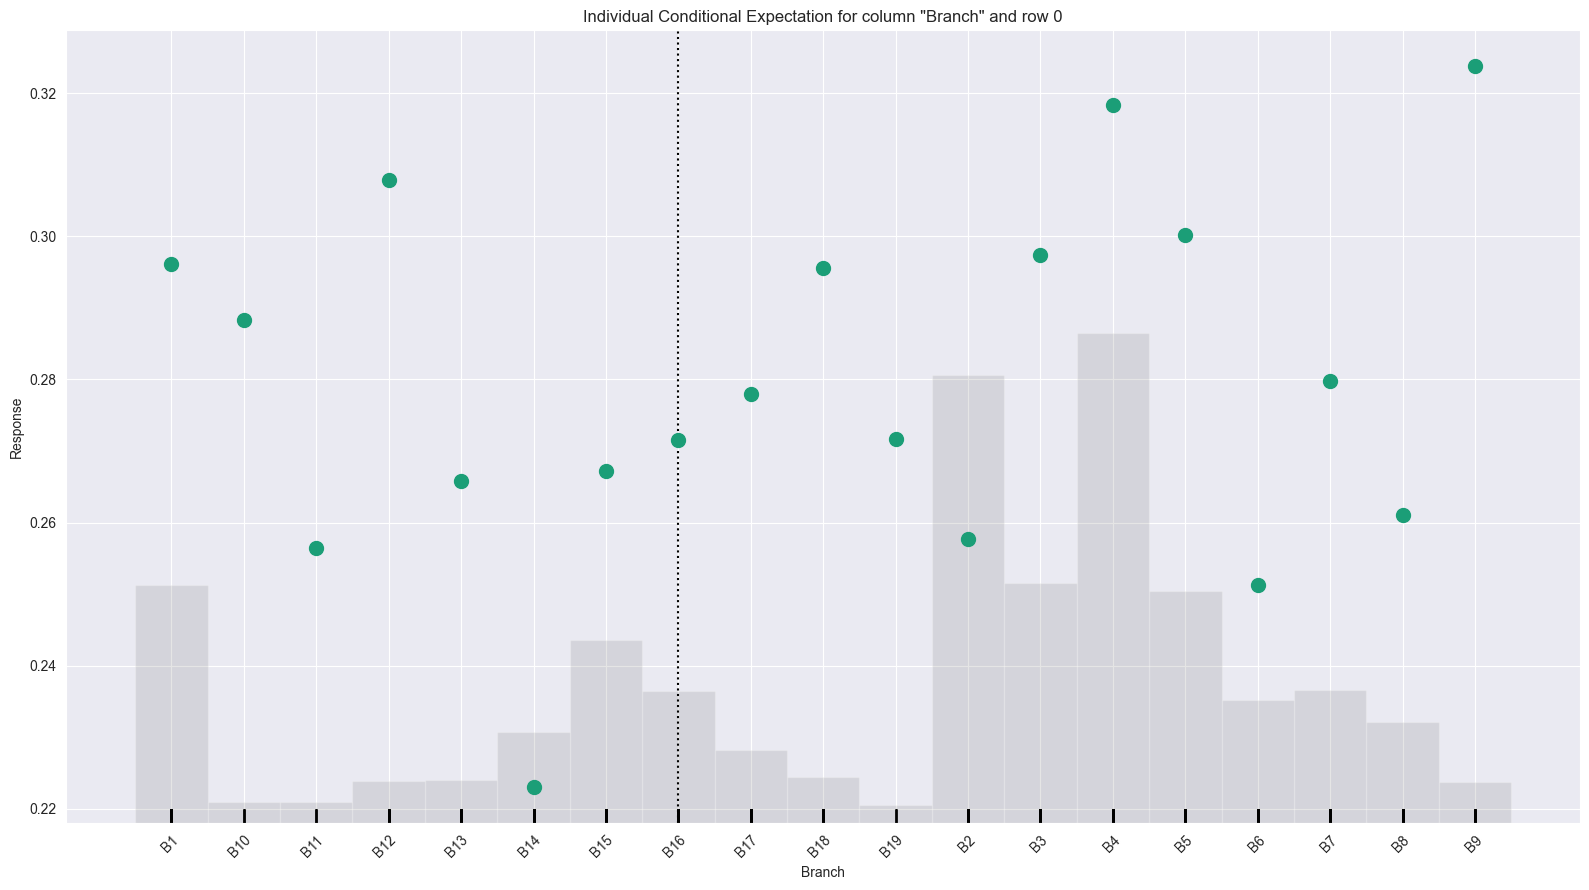

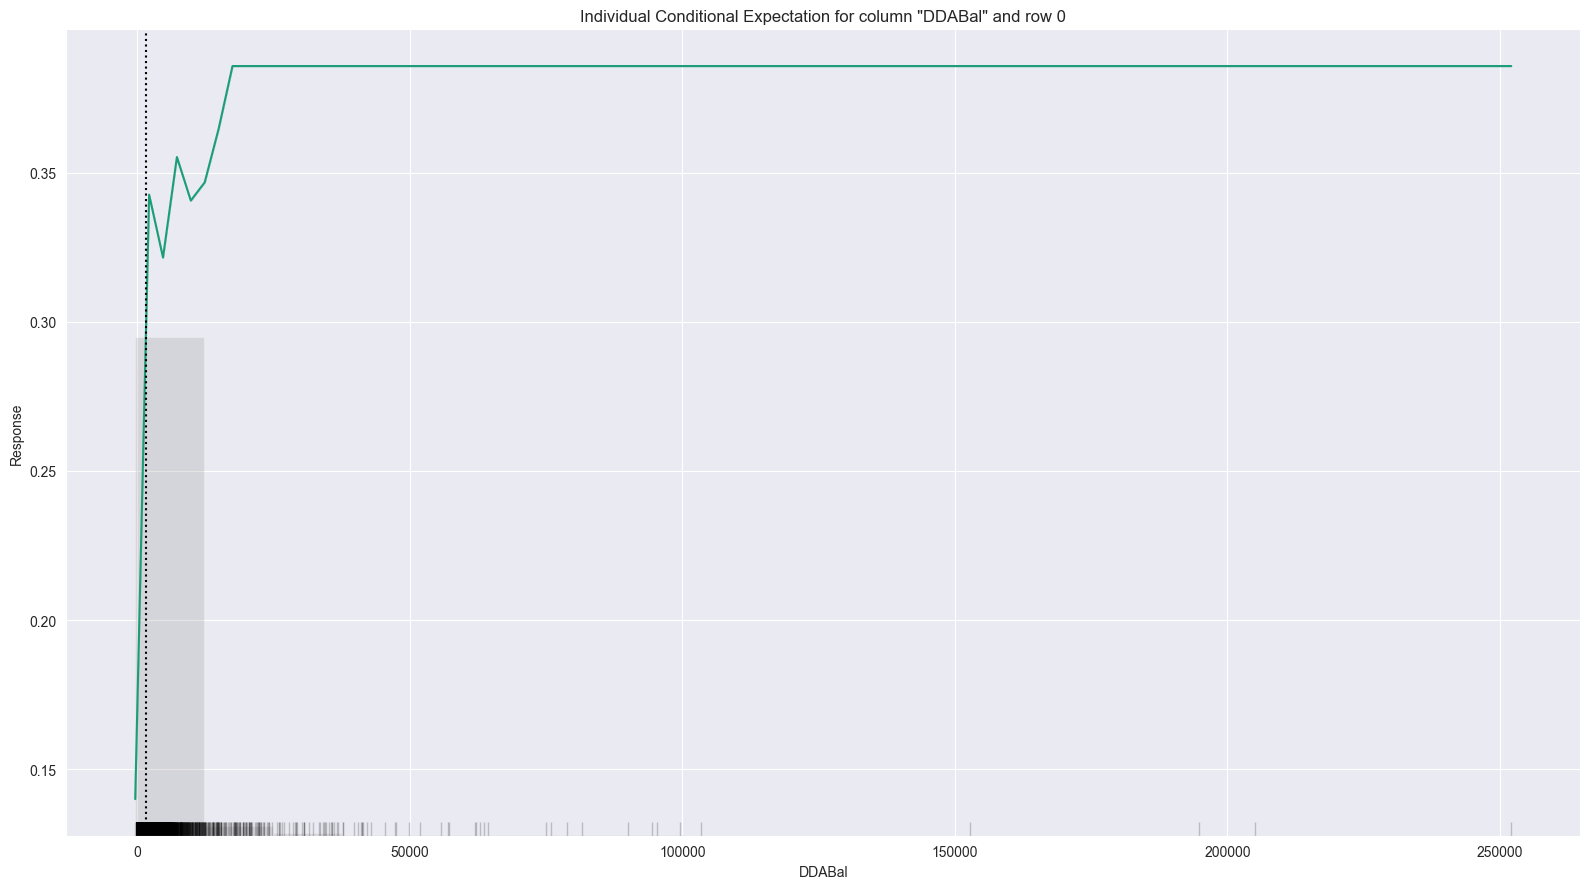

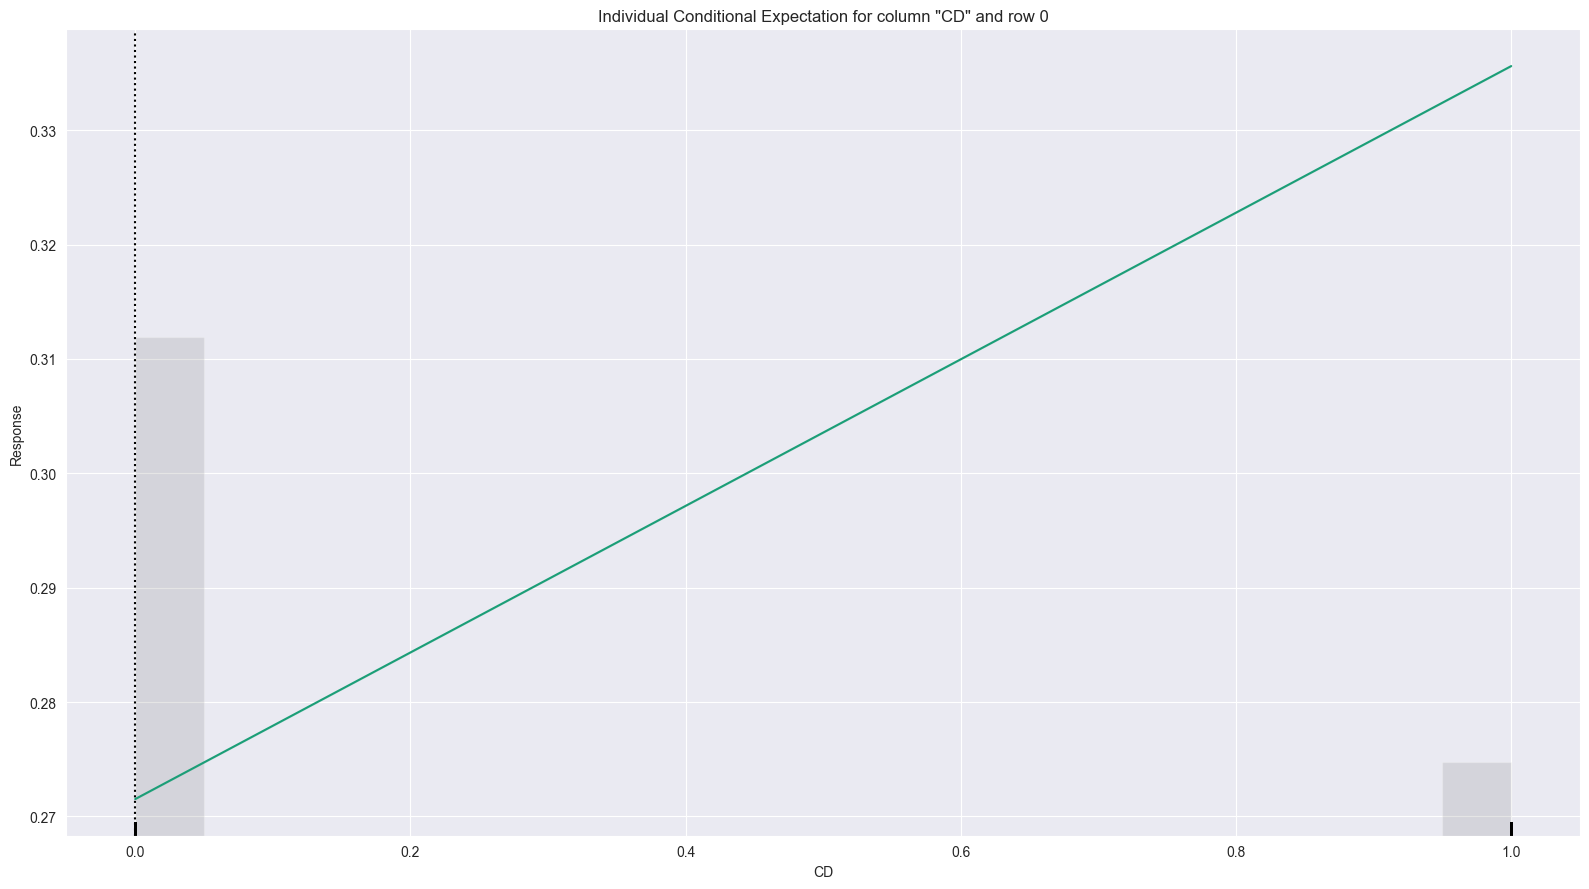

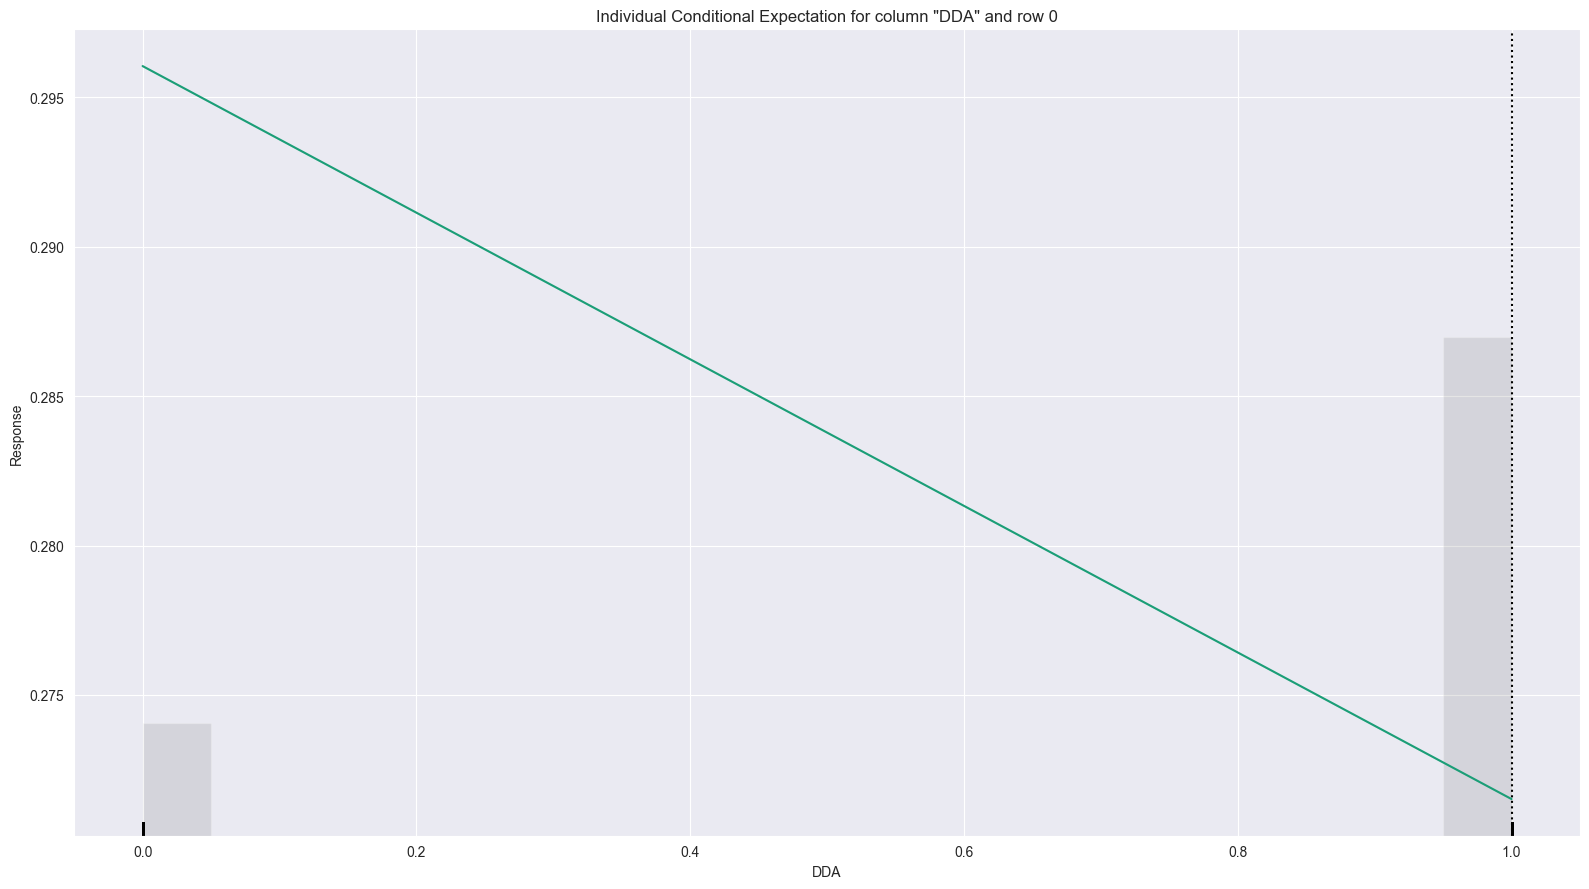

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

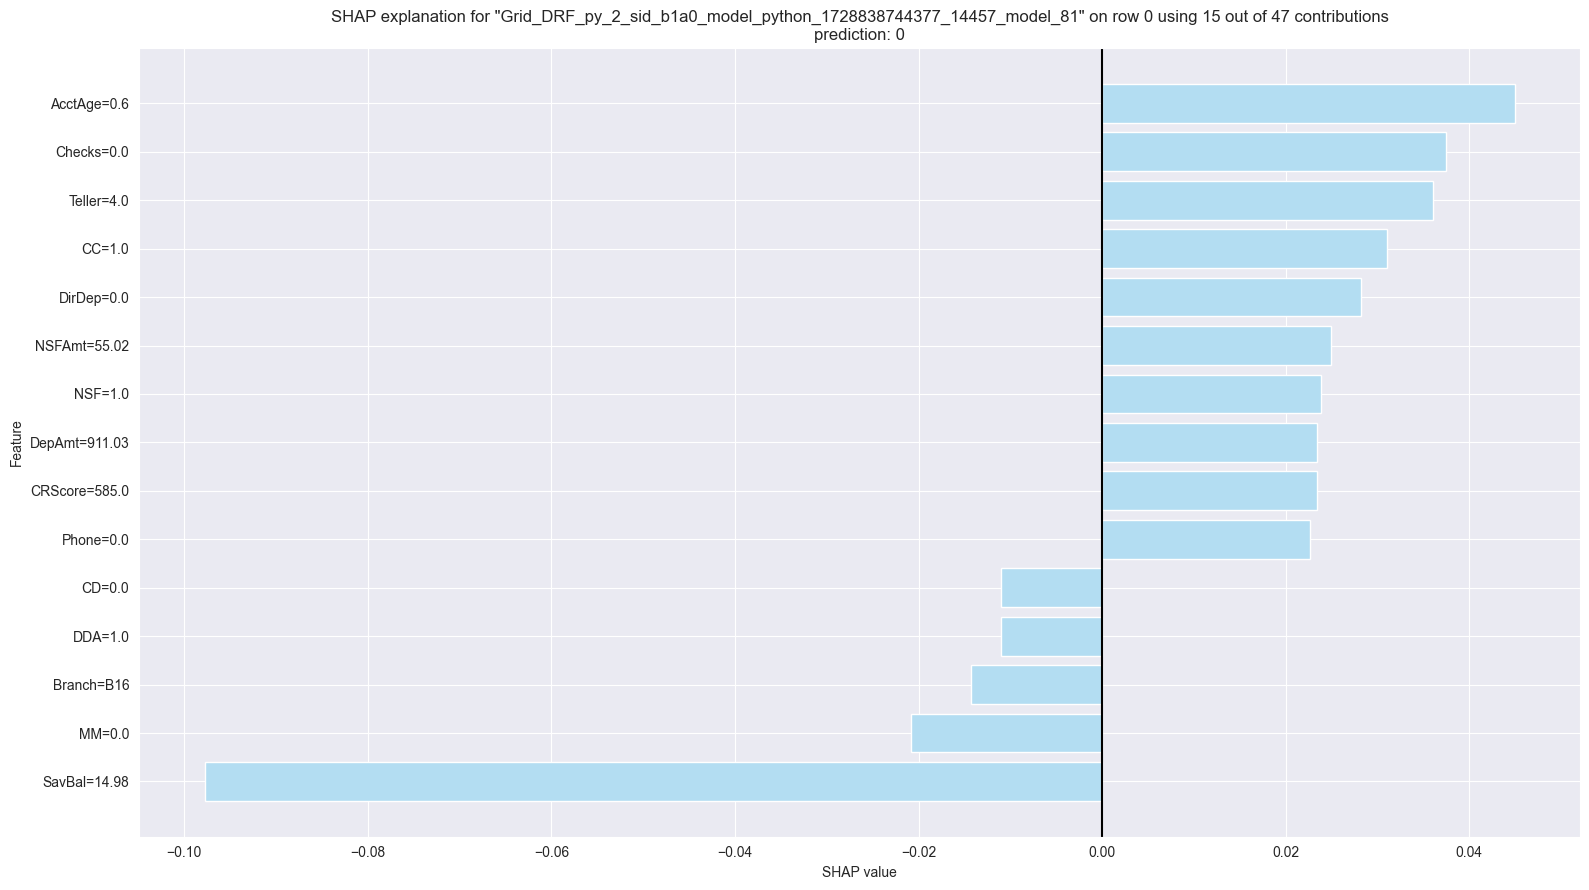

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

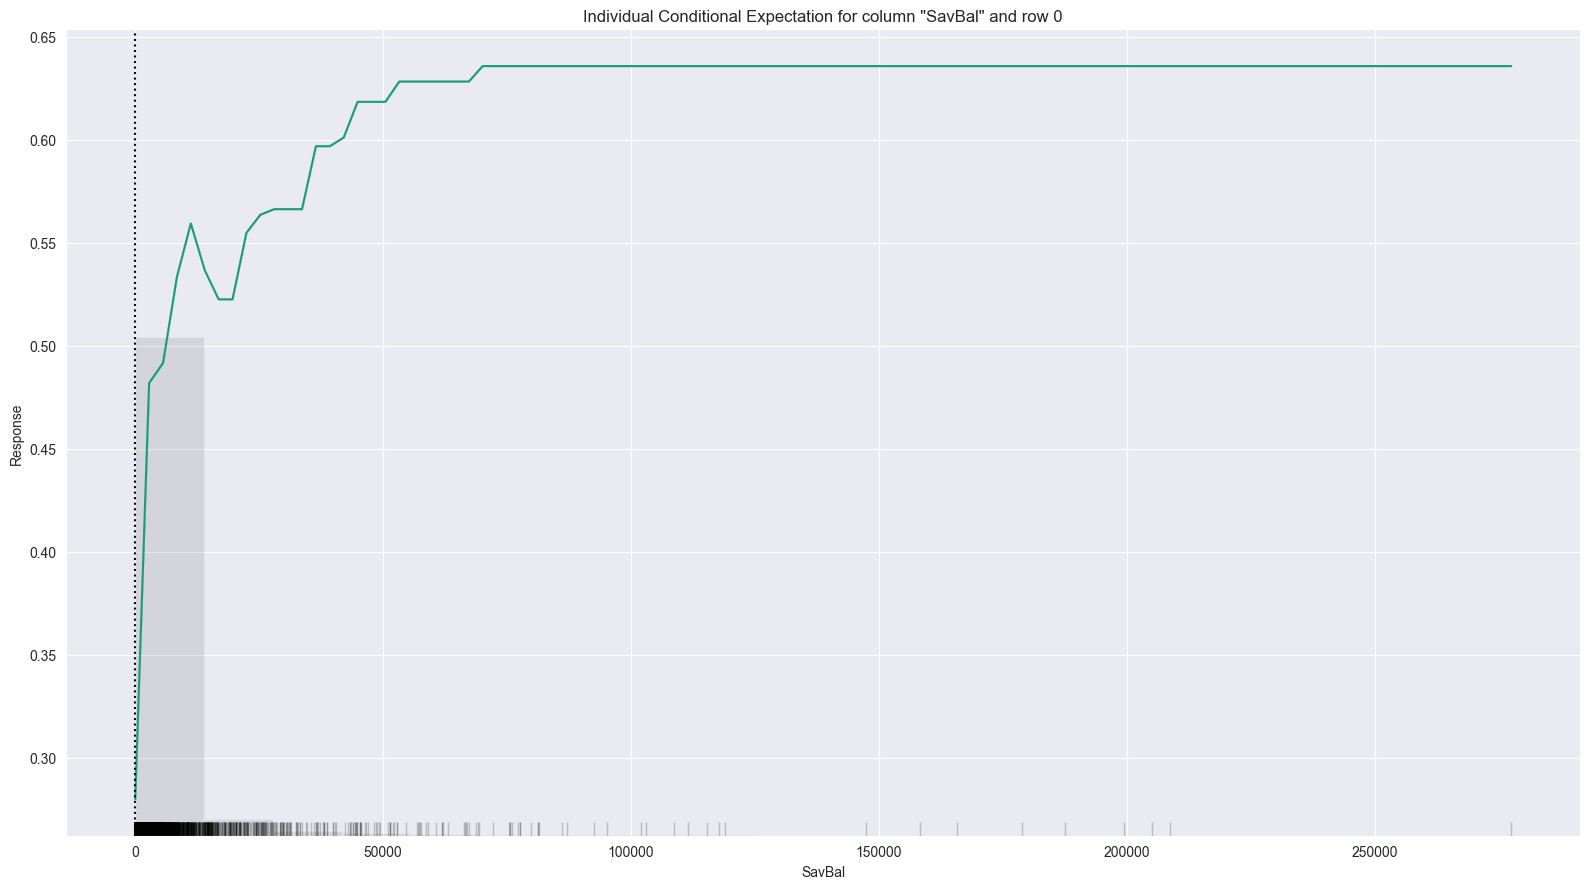

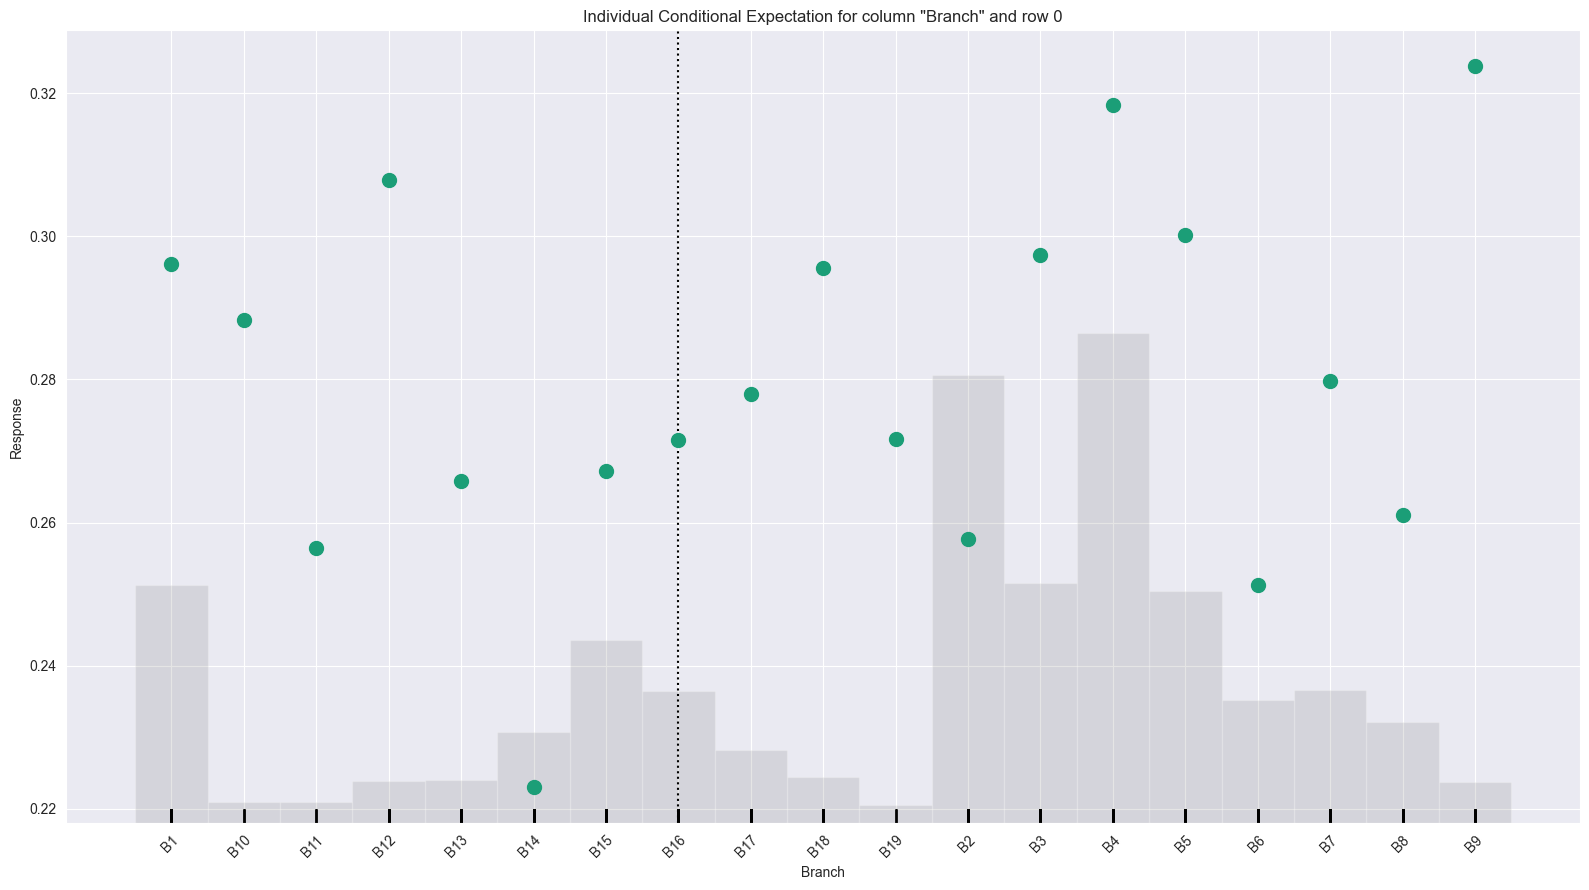

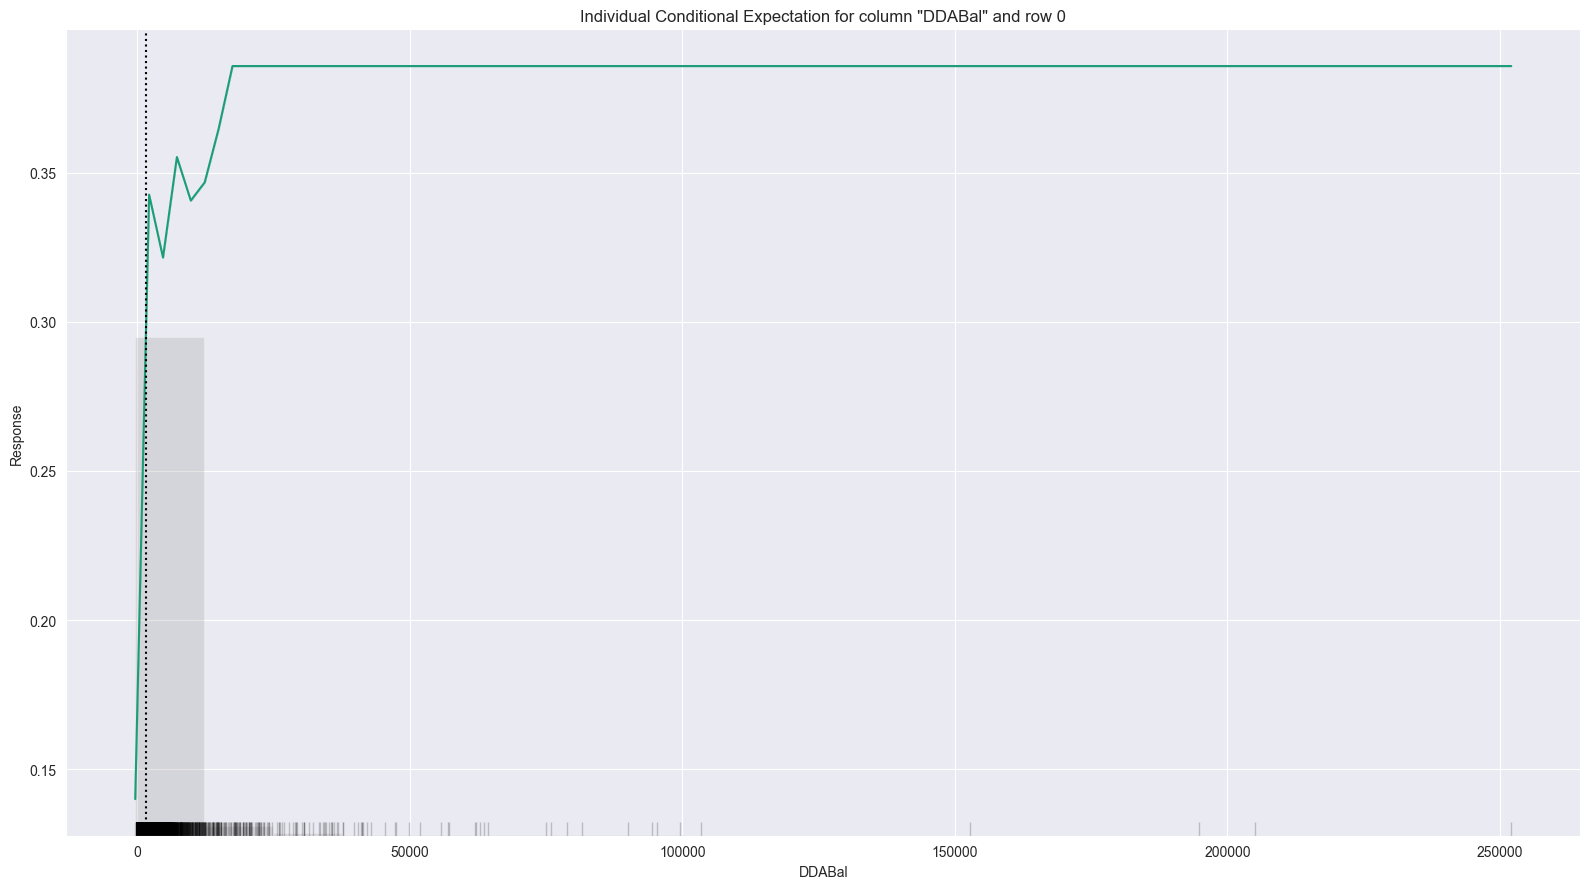

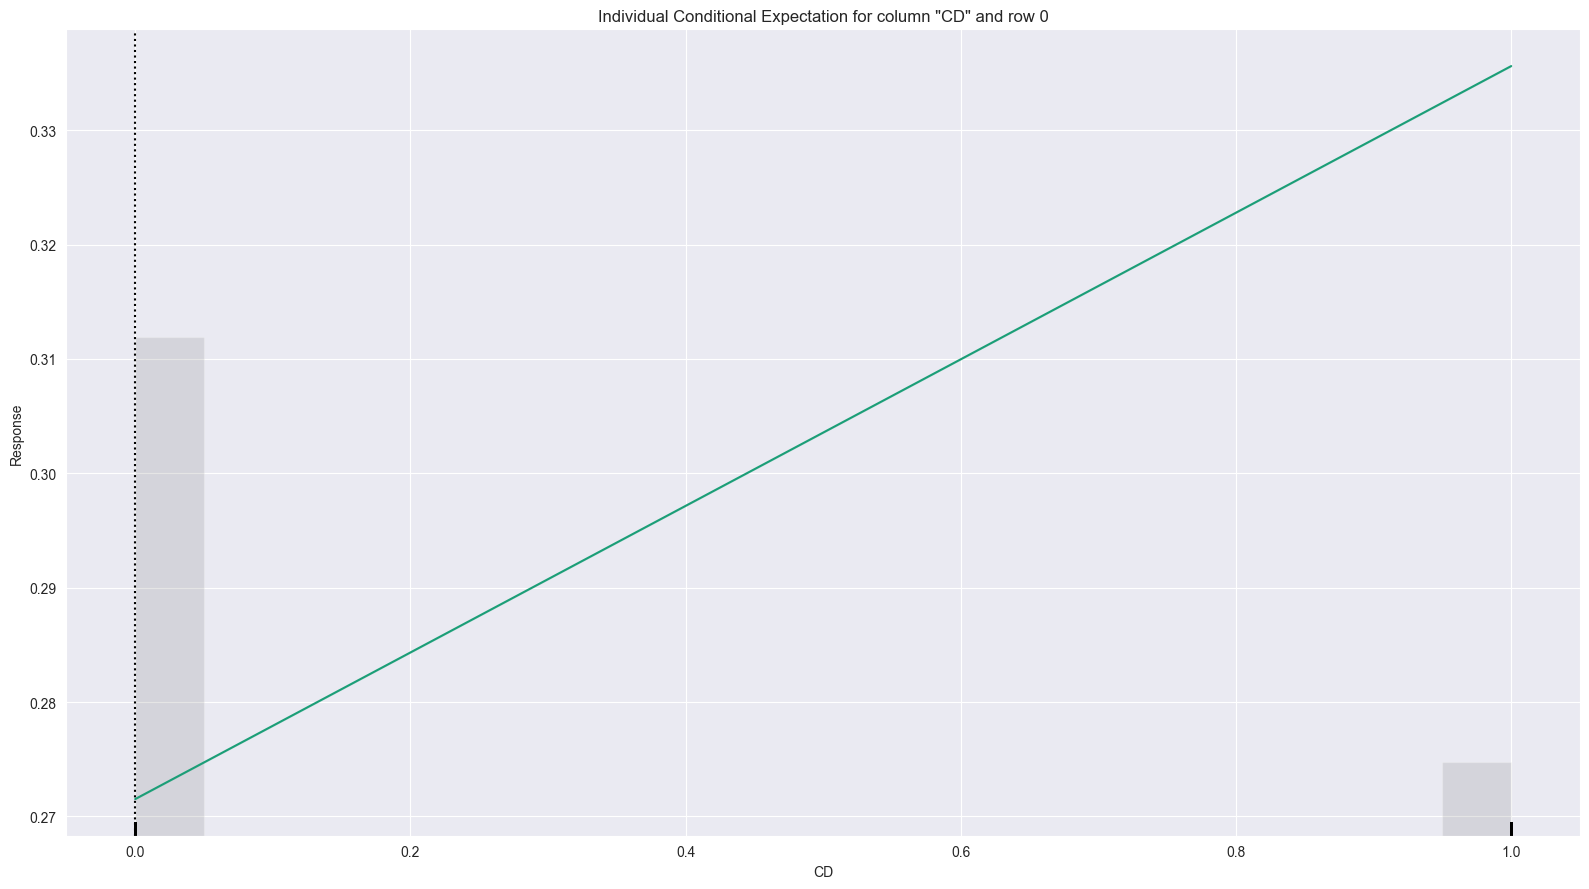

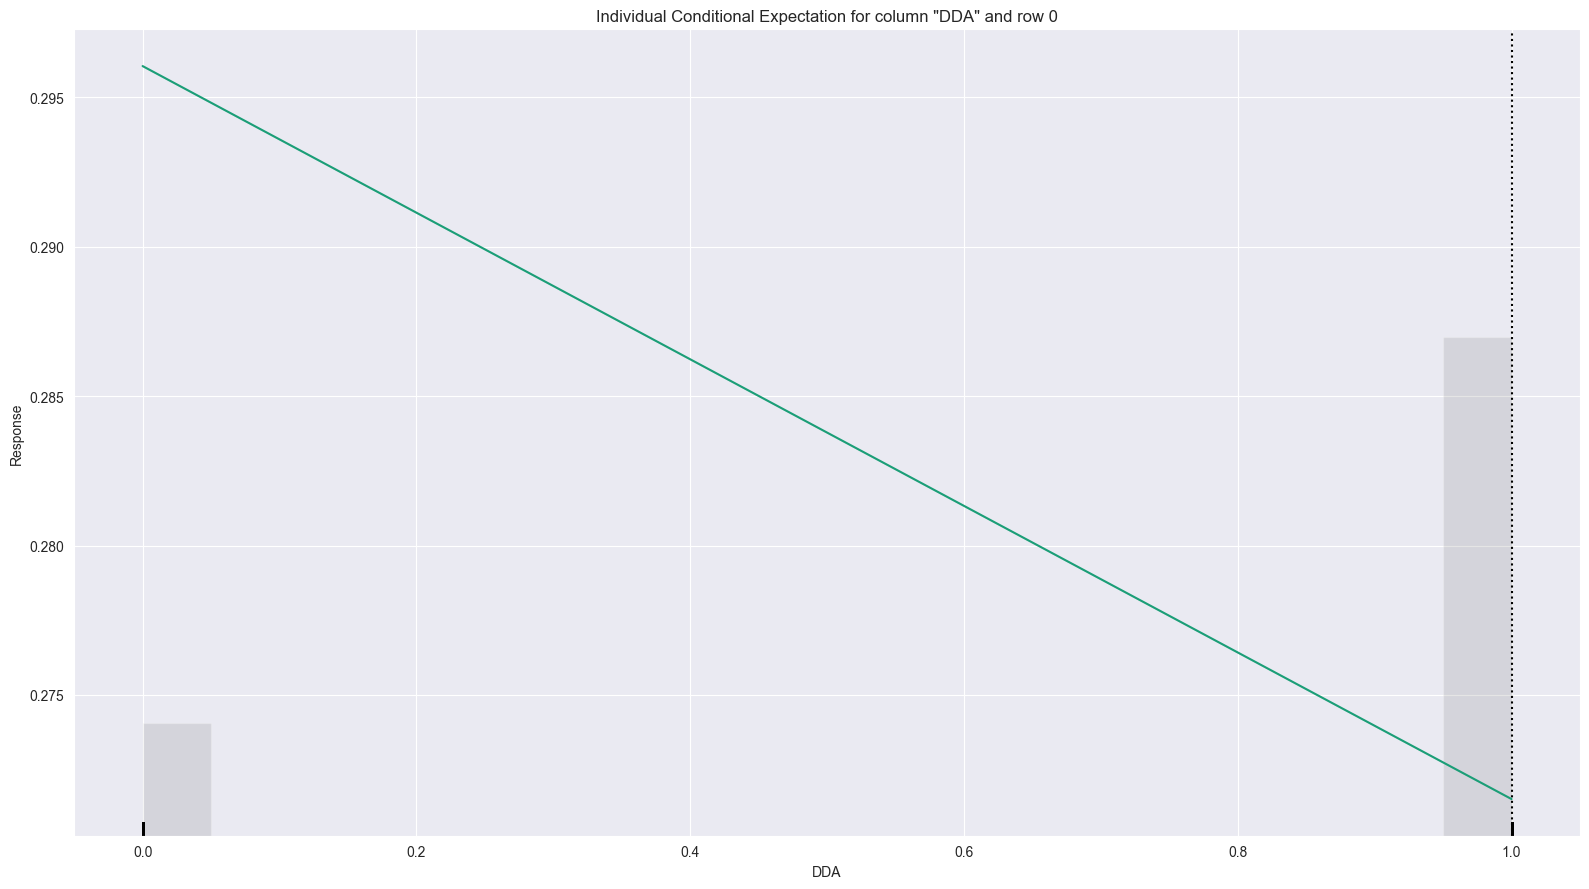

In [38]:
import h2o.explanation

# Bendras modelio paaiškinimas
h2o.explain(best_rf_model, test_h2o)

# Konkretus įrašo paaiškinimas
h2o.explain_row(best_rf_model, test_h2o, row_index=0)

### Naive Bayes

In [39]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ONaiveBayesEstimator

# Hiperparametrų tinklelį
hyper_params = {
    'laplace': [0, 1, 2],       # Laplace sklandinimo parametras
    'min_sdev': [0.001, 0.01, 0.1],  # Minimalus standartinis nuokrypis
    'eps_sdev': [0, 1e-4, 1e-3] # Saugumo slenkstis nuokrypiui
}

# Sukuriame Naiviojo Bayeso modelio tinklelio paiešką su H2OGridSearch
grid_search = H2OGridSearch(
    model=H2ONaiveBayesEstimator(seed=42),
    hyper_params=hyper_params,
    search_criteria={
        "strategy": "Cartesian"  # Išbandys visas kombinacijas, galima naudoti „RandomDiscrete“ greitesniam paieškojimui
    }
)

# Paleidziama tinklelio paiešką
grid_search.train(x=x, y=y, training_frame=train_h2o, validation_frame=test_h2o)

naivebayes Grid Build progress: |████████████████████████████████████████████████| (done) 100%


,eps_sdev,laplace,min_sdev,model_ids,logloss
,0.0,0.0,0.001,Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_1,2.6324280
,0.0,0.0,0.01,Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_10,2.6324280
,0.0001,0.0,0.01,Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_11,2.6324280
,0.001,0.0,0.01,Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_12,2.6324280
,0.0,0.0,0.1,Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_19,2.6324280
,0.0001,0.0,0.001,Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_2,2.6324280
,0.0001,0.0,0.1,Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_20,2.6324280
,0.001,0.0,0.1,Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_21,2.6324280
,0.001,0.0,0.001,Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_3,2.6324280
,0.0,1.0,0.01,Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_13,2.6324351


In [40]:
# Gaukite tinklelio paieškos rezultatus
grid_results = grid_search.get_grid(sort_by="auc", decreasing=True)  # Pvz., rikiuojama pagal AUC
print(grid_results)

# Gaukite geriausią modelį
best_nb_model = grid_results.models[0]

# Išveskite geriausio modelio parametrus ir metrikas
print("Best model parameters:", best_nb_model.params)
print("Best model AUC:", best_nb_model.auc())

Hyper-Parameter Search Summary: ordered by decreasing auc
     eps_sdev    laplace    min_sdev    model_ids                                                                auc
---  ----------  ---------  ----------  -----------------------------------------------------------------------  ------------------
     0.0         1.0        0.01        Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_13  0.7258941916130189
     0.0001      1.0        0.01        Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_14  0.7258941916130189
     0.001       1.0        0.01        Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_15  0.7258941916130189
     0.0         1.0        0.1         Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_22  0.7258941916130189
     0.0001      1.0        0.1         Grid_NaiveBayes_py_2_sid_b1a0_model_python_1728838744377_28390_model_23  0.7258941916130189
     0.001       1.0        0.1  

### PANAUDOJAM SMOTE IR PAZIURIM AR PAGEREJO MODELIU KOKYBE ( DEL KLASIU DISBALANSO)


In [4]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('../2 - Data/develop.csv')  # Path to your data
target = 'Ins'  # Define your target variable

# Apply pd.get_dummies to the entire dataset
data_dummies = pd.get_dummies(data, drop_first=True)

# Split the dataset into train and test sets
train, test = train_test_split(data_dummies, test_size=0.2, random_state=42, stratify=data[target])

# Separate features and target in the training set
X_train = train.drop(columns=[target])
y_train = train[target]

# Apply SMOTE to balance classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Combine resampled features and target back into a DataFrame
train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_resampled[target] = y_train_resampled

# Convert resampled DataFrame and test set to H2O Frames
train_h2o_smote = h2o.H2OFrame(train_resampled)
test_h2o = h2o.H2OFrame(test)

# Convert the target column to a factor for classification
train_h2o_smote[target] = train_h2o_smote[target].asfactor()
test_h2o[target] = test_h2o[target].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [51]:
# AutoML with SMOTE-balanced data
aml_smote = H2OAutoML(max_models=20, seed=42, balance_classes=False)
aml_smote.train(x=train_h2o_smote.columns, y=target, training_frame=train_h2o_smote, validation_frame=test_h2o)

# Model performance evaluation
print("\nSMOTE Model Performance on Test Data:")
print(aml_smote.leader.model_performance(test_h2o))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:49:30.622: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:49:30.622: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%

SMOTE Model Performance on Test Data:
ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.16647546435221103
RMSE: 0.4080140492093514
LogLoss: 0.5051712373616309
AUC: 0.8075583708045736
AUCPR: 0.6829560837552651
Gini: 0.6151167416091472
Null degrees of freedom: 6452
Residual degrees of freedom: 6444
Null deviance: 8945.757512307619
Residual deviance: 6

In [52]:
lb = aml_smote.leaderboard
print(lb.head(rows=lb.nrows))

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_3_20241014_134930     0.894689   0.404293  0.906245                0.195632  0.362232  0.131212
StackedEnsemble_BestOfFamily_1_AutoML_3_20241014_134930  0.890892   0.410364  0.902951                0.199455  0.365342  0.133475
GBM_4_AutoML_3_20241014_134930                           0.887602   0.417519  0.899685                0.207397  0.368563  0.135839
GBM_grid_1_AutoML_3_20241014_134930_model_4              0.887015   0.421704  0.896691                0.206004  0.369805  0.136756
GBM_3_AutoML_3_20241014_134930                           0.886976   0.419549  0.899128                0.2023    0.368932  0.136111
GBM_grid_1_AutoML_3_20241014_134930_model_5              0.886592   0.418968  0.899032                0.2031    0.369193  0.136304
GBM_2_AutoML_3_20241014_134930                           0.88541    0.422819  0.897

In [53]:
best_smote_auto_ml = aml_smote.leader

In [ ]:
# Bendras modelio paaiškinimas
h2o.explain(best_smote_auto_ml, test_h2o)

# Konkretus įrašo paaiškinimas
h2o.explain_row(best_smote_auto_ml, test_h2o, row_index=0)

In [1]:
from sklearn.metrics import roc_curve, det_curve, roc_auc_score
import matplotlib.pyplot as plt
# Modelio vertinimas su testavimo duomenimis
perf = aml_smote.leader.model_performance(test_h2o)

# Spausdinti AUC ir klaidų matricą
print("\nAUC reikšmė su testavimo duomenimis:")
print(perf.auc())

print("\nKlaidų matrica su testavimo duomenimis:")
print(perf.confusion_matrix())

# ROC kreivės grafikas
fpr, tpr, thresholds = perf.roc_curve()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {perf.auc():.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

NameError: name 'aml_smote' is not defined

### SMOTE GBM


In [10]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGradientBoostingEstimator

# Hiperparametrų rinkinys
hyper_params = {
    'ntrees': [5, 5, 15],           # Medžių skaičius
    'max_depth': [3, 4, 5],           # Maksimalus gylis
    'learn_rate': [0.01, 0.05, 0.1],    # Mokymosi tempas
    'sample_rate': [0.8, 1.0]           # Pavyzdžių atrankos tempas
}

# Paieškos kriterijai (naudojame RandomDiscrete, kad greičiau išbandytume derinius)
search_criteria = {
    "strategy": "RandomDiscrete",
    "max_models": 10,          # Maksimalus modelių skaičius
    "max_runtime_secs": 600     # Maksimali paieškos trukmė sekundėmis
}

# Sukuriame H2OGridSearch su GBM modeliu
grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator(seed=42),
    hyper_params=hyper_params,
    search_criteria=search_criteria
)

# Paleidžiame Grid Search su subalansuotu SMOTE treniravimo rinkiniu
grid.train(x=train_h2o_smote.columns, y=target, training_frame=train_h2o_smote, validation_frame=test_h2o)

# Gaukite geriausią modelį pagal AUC
best_gbm = grid.get_grid(sort_by="auc", decreasing=True).models[0]

# Parodykite geriausio modelio hiperparametrus ir metrikas
print("Best model hyperparameters:", best_gbm.params)
print("Best model AUC:", best_gbm.auc())

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Best model hyperparameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_GBM_py_1_sid_a43d_model_python_1728838744377_37062_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_GBM_py_1_sid_a43d_model_python_1728838744377_37062_model_1'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_1_sid_a43d', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_1_sid_a43d'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_1_sid_a43d', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_1_sid_a43d'}}, 'validation_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'n

In [11]:
from sklearn.metrics import roc_curve, det_curve, roc_auc_score
# Modelio vertinimas su testavimo duomenimis
perf = best_gbm.model_performance(test_h2o)

# Spausdinti AUC ir klaidų matricą
print("\nAUC reikšmė su testavimo duomenimis:")
print(perf.auc())

print("\nKlaidų matrica su testavimo duomenimis:")
print(perf.confusion_matrix())


AUC reikšmė su testavimo duomenimis:
0.7859104954477614

Klaidų matrica su testavimo duomenimis:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4514438972791944
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2698  1520  0.3604   (1520.0/4218.0)
1      423   1812  0.1893   (423.0/2235.0)
Total  3121  3332  0.3011   (1943.0/6453.0)


In [12]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator

# Hiperparametrų rinkinį
hyper_params = {
    'ntrees': [10, 25, 50],        # Skirtingas medžių skaičius
    'max_depth': [5, 10, 30],       # Skirtingas maksimalus gylis
    'min_rows': [1, 5, 10],          # Minimalus įrašų skaičius mazge
    'sample_rate': [0.7, 0.8, 0.9],  # Pavyzdžių atrankos norma
    'mtries': [3, 5, 10]             # Požymių skaičius, atrinktas kiekvienam medžiui (naudokite -1 visiems požymiams)
}

# Sukuriame „Random Forest“ modelį su H2OGridSearch
grid_search = H2OGridSearch(
    model=H2ORandomForestEstimator(seed=42),
    hyper_params=hyper_params,
    search_criteria={
        "strategy": "Cartesian"  # Išbandys kiekvieną kombinaciją, galima naudoti „RandomDiscrete“ greitesniam paieškojimui
    }
)

# Peliedizame tinklelio paiešką
grid_search.train(x=train_h2o_smote.columns, y=target, training_frame=train_h2o_smote, validation_frame=test_h2o)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,min_rows,mtries,ntrees,sample_rate,model_ids,logloss
,30.0,5.0,10.0,50.0,0.8,Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_159,0.5258875
,30.0,1.0,10.0,50.0,0.9,Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_237,0.5276883
,30.0,5.0,10.0,50.0,0.7,Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_78,0.5276911
,30.0,5.0,10.0,50.0,0.9,Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_240,0.5280663
,30.0,5.0,10.0,25.0,0.8,Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_132,0.5302881
,30.0,10.0,10.0,50.0,0.9,Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_243,0.5315644
,30.0,10.0,10.0,50.0,0.8,Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_162,0.5318089
,30.0,5.0,10.0,25.0,0.9,Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_213,0.5318196
,30.0,5.0,10.0,25.0,0.7,Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_51,0.5323480
,30.0,1.0,10.0,50.0,0.7,Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_75,0.5325852


In [14]:
# Peržiūrėkite tinklelio paieškos rezultatus
grid_results = grid_search.get_grid(sort_by="auc", decreasing=True)
print(grid_results)

# Gaukite geriausią modelį pagal AUC
best_rf_model_smote = grid_results.models[0]

# Modelio vertinimas su testavimo duomenimis
perf = best_rf_model_smote.model_performance(test_h2o)

# Spausdinti AUC ir klaidų matricą
print("\nAUC reikšmė su testavimo duomenimis:")
print(perf.auc())

print("\nKlaidų matrica su testavimo duomenimis:")
print(perf.confusion_matrix())

Hyper-Parameter Search Summary: ordered by decreasing auc
     max_depth    min_rows    mtries    ntrees    sample_rate    model_ids                                                          auc
---  -----------  ----------  --------  --------  -------------  -----------------------------------------------------------------  ------------------
     30.0         5.0         10.0      50.0      0.8            Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_159  0.7969422088991146
     30.0         10.0        10.0      50.0      0.8            Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_162  0.7961444135764164
     30.0         10.0        10.0      50.0      0.7            Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_81   0.7961109466937796
     30.0         5.0         10.0      50.0      0.7            Grid_DRF_py_1_sid_a43d_model_python_1728838744377_37264_model_78   0.7958485154175723
     30.0         10.0        10.0      50.0      0

### GRAFIKAI

naivebayes prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████| (done) 100%
drf prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


██████████████████████████████████████████████| (done) 100%
gbm prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%


/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


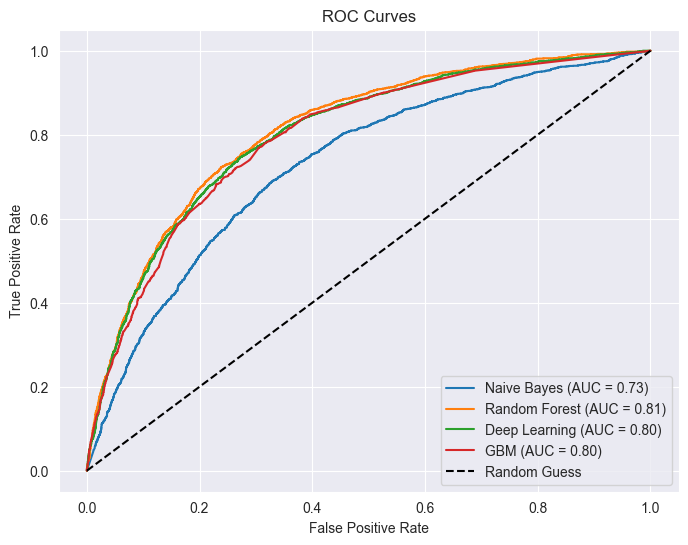

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
drf prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


██████████████████████████████████████████████| (done) 100%
gbm prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%


/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


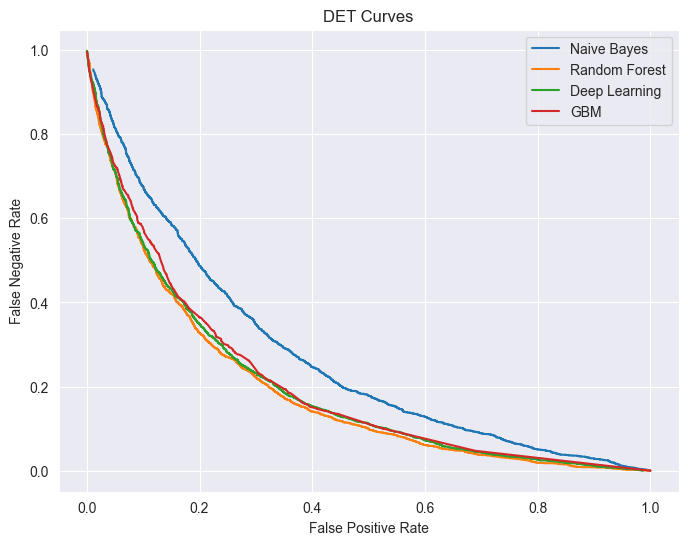

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
drf prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


██████████████████████████████████████████████| (done) 100%
gbm prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%


/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


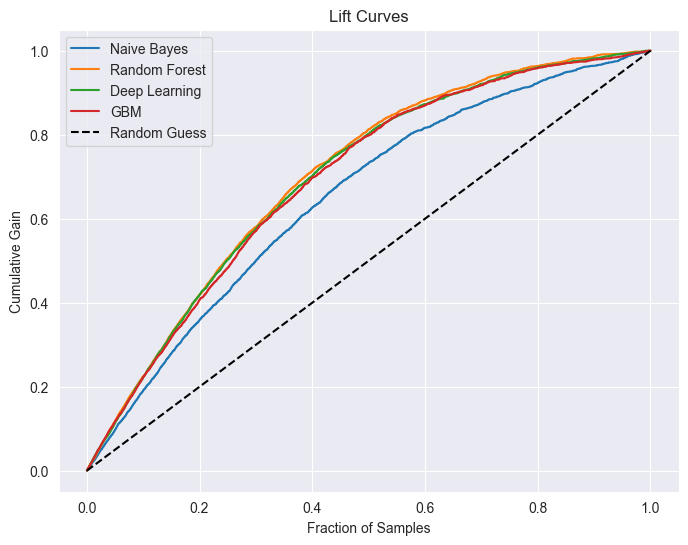

In [44]:
from sklearn.metrics import roc_curve, det_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Konvertuokite y_test į „Pandas“ seriją, jei jis yra H2OFrame
y_test = test_h2o[target].as_data_frame().values.ravel()  # Tikslinis kintamasis

# Sukurkite funkciją, kuri apskaičiuoja tikimybes iš H2O modelio
def get_probabilities(model, test_data):
    predictions = model.predict(test_data)  # Gauname numatymus su H2O modeliu
    if predictions.shape[1] > 1:  # Jei yra tikimybių stulpelis
        return predictions.as_data_frame().iloc[:, 2].values  # Teigiamos klasės tikimybė
    else:
        raise ValueError("Model does not support probability predictions")

# Modelių sąrašas, kurį norite palyginti
models = {
    'Naive Bayes': best_nb_model,
    'Random Forest': best_rf_model,
    'Deep Learning': dl_model,
    'GBM': gbm_model
}

# 1. ROC kreivė visiems modeliams
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_test_proba = get_probabilities(model, test_h2o)
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 2. DET kreivė visiems modeliams
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_test_proba = get_probabilities(model, test_h2o)
    fpr_det, fnr_det, _ = det_curve(y_test, y_test_proba)
    plt.plot(fpr_det, fnr_det, label=f'{model_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.title('DET Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 3. Lift kreivė visiems modeliams
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_test_proba = get_probabilities(model, test_h2o)
    sorted_indices = np.argsort(y_test_proba)[::-1]
    sorted_y_test = y_test[sorted_indices]
    cumulative_gain = np.cumsum(sorted_y_test) / np.sum(sorted_y_test)
    x_lift = np.arange(1, len(sorted_y_test) + 1) / len(sorted_y_test)
    plt.plot(x_lift, cumulative_gain, label=f'{model_name}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('Fraction of Samples')
plt.ylabel('Cumulative Gain')
plt.title('Lift Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [7]:

# Shut down H2O when done
h2o.shutdown()

H2O session _sid_8b61 closed.


/var/folders/sh/y7_11shj52j5ym8tns5r5r0h0000gn/T/ipykernel_15260/2571893919.py:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
